# Setup
___


In [6]:
!pip install pandasql

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from pandasql import sqldf

In [8]:
pd.set_option("display.max_rows", None)
df = pd.read_csv("surveyCSV.csv")
df.duplicated().value_counts()

False    171
Name: count, dtype: int64

# Utility Functions
___


In [9]:
def return_novo_valor_if_word_in_palavras(df_word, palavras, novo_valor):
    if pd.isna(df_word):  # Verifica se o valor é NaN
        return df_word  # Mantém NaN sem alterar

    df_word_upper = str(df_word).upper()  # Garante que seja string e converte para maiúsculas
    for palavra in palavras:
        if df_word_upper == palavra.upper():
            return novo_valor
    return df_word

def given_df_col_return_split_values(df_col, column_name):
  return df_col.str.split(', ').explode(column_name).reset_index(drop=True)

# Preprocessing
---

## Column Name
___

In [10]:
df = df.rename(columns={'Unnamed: 1': 'participation',
                        'Sexo:': 'Sexo',
                        'Localização:': 'Localização',
                        'Formação:': 'Formação',
                        'Porte da Organização:': 'Organização',
                        'Qual a sua experiência no cargo ocupado?': 'Experiência',
                        'De acordo com o seu cargo, em qual nível você se encontra?': 'Nível',
                        'Você possui alguma certificação relacionada ao cargo que você está ocupando?': 'Certificação',
                        'Você sempre atuou na área Tech? ': 'Sempre trabalhou na área',
                        'Qual o seu cargo ou função na organização? ': 'Cargo',
                        'Em quais stacks você já atuou e/ou está trabalhando atualmente?': 'Stacks',
                        'Eu compreendo a técnica de teste funcional, seus critérios e sou capaz de aplicá-la na prática': 'Teste funcional',
                        'Eu compreendo a técnica de teste estrutural (caixa-branca), seus critérios e sou capaz de aplicá-la na prática': 'Teste estrutural',
                        'Eu compreendo a técnica baseada em defeitos, critérios de análise de mutantes e sou capaz de aplicá-la': 'Teste baseado em defeitos e Análise de Mutantes',
                        'Eu tenho experiência com automatização de testes de software e sou capaz de aplicá-la': 'Automatização de testes',
                        'Eu compreendo os fundamentos de BDD': 'BDD',
                        'Eu compreendo e utilizo cucumber + gherking': 'Cucumber + Gherking',
                        'Eu compreendo e aplico os conceitos de agile testing': 'Agile Testing',
                        'Marque a opção correta para engano, defeito, erro e falha: [Engano]': 'Definição de [Engano]',
                        'Marque a opção correta para engano, defeito, erro e falha: [Defeito]': 'Definição de [Defeito]',
                        'Marque a opção correta para engano, defeito, erro e falha: [Erro]': 'Definição de [Erro]',
                        'Marque a opção correta para engano, defeito, erro e falha: [Falha]': 'Definição de [Falha]',
                        'Com relação a sua experiência com ferramentas para o teste de aplicações mobile, marque aquelas que você utiliza ou já utilizou:': 'Ferramentas [Mobile]',
                        'Com relação a sua experiência com ferramentas para o teste de aplicações web (partindo do front-end), marque aquelas que você utiliza ou já utilizou:': 'Ferramentas [Front-end]',
                        'Com relação a sua experiência com ferramentas para o teste APIs REST (back-end), marque aquelas que você utiliza ou já utilizou:': 'Ferramentas [Back-end]',
                        'Quais linguagens de programação você já utilizou para automação de testes de software?': 'Linguagens de programação',
                        "Durante seu aprendizado, você percebeu dificuldades em encontrar materiais de estudo relacionado a qualidade de software?": 'Dificuldades em encontrar materiais de estudo',
                        'Quais fontes você geralmente utiliza para aprimorar suas habilidades?': 'Fontes de aprendizado',
                        'Quais as habilidades mais importantes para um um QA eficiente? Marque no máximo 5 das opções disponíveis.': '5 habilidades fundamentais para um QA',
                        'Quais atividades que você, como um QA, está desempenhando na organização? Marque no máximo 5 das opções disponíveis.': 'Atividades desempenhadas',
                        'Qual(is) etapa(s) do processo de desenvolvimento de software você participa?': 'Etapas da Engenharia de Software',
                        'Qual(is) nível(is) de testes você aplica durante o processo de desenvolvimento de software?': 'Níveis de testes aplicados',
                        'Qual(is) tipo(s) de testes você realiza durante o processo de desenvolvimento de software?': 'Tipos de testes aplicados',
                        'Existem outras atividades, não mencionadas no formulário, que você executa durante o processo de desenvolvimento de software?': 'Outras atividades'
                        })

## Content
___


In [11]:
df = df.drop(df[df.participation == 'Li e não aceito participar da pesquisa'].index)

In [12]:
df = df.drop(columns=['Carimbo de data/hora', 'participation'])

In [13]:
df

,Sexo,Localização,Formação,Organização,Experiência,Nível,Certificação,Sempre trabalhou na área,Cargo,Stacks,...,Linguagens de programação,Dificuldades em encontrar materiais de estudo,Fontes de aprendizado,5 habilidades fundamentais para um QA,Atividades desempenhadas,Etapas da Engenharia de Software,Níveis de testes aplicados,Tipos de testes aplicados,"Existem outras atividades, não mencionadas no formulário, que você executa durante o processo de testes de software?","Qual a sua percepção sobre a utilização de assistentes inteligentes e LLMs para geração de dados de teste? Vantagens, desvantagens e ajuda mesmo em cenários com lógicas complexas? Comenta aqui pra gente ;)"
1,Masculino,Lauro de Freitas - BA,Ensino Superior Completo,Média (até 499 funcionários),De 4 a 7 anos,"Pleno (atividades específicas, que exigem prof...",cTFL,Sim,Analista de Automação de Testes,"Web, Mobile",...,"Java, JavaScript, Python, Ruby",Não,"Canais do Youtube, Medium, Cursos (Udemy, plat...","Aprender rápido, Ser detalhista, Ser curioso, ...",Avaliar e garantir que os requisitos sejam ate...,Integração e Testes do Sistema,"Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Caixa Branca (T...",Nao,NaN
2,Feminino,Uberlandia-MG,Ensino Superior Incompleto,Grande (mais de 499 funcionários),Menos de 1 ano,Júnior (funções de procedimentos simples ou qu...,Nao7,Sim,Quality Assurance - QA,Web,...,Java,Sim,"Cursos (Udemy, plataformas online), Sigo refer...","Aprender rápido, Pensar como técnico e usuário...",Avaliar e garantir que os requisitos sejam ate...,Integração e Testes do Sistema,"Testes de Sistema, Testes de Regressão","Caixa Preta (Teste Funcional), Manual",Nao,NaN
3,Masculino,Ponta Grossa - PR,Ensino Superior Completo,Grande (mais de 499 funcionários),De 4 a 7 anos,"Sênior (toma decisões, e age de forma autônoma...",Sim,"Não, já atuei com suporte técnico também",Analista de sistemas senior,Web,...,"Java, Ruby",Sim,"Canais do Youtube, Cursos (Udemy, plataformas ...","Aprender rápido, Ser comunicativo(a), Ser deta...",Realizar automação dos testes,"Integração e Testes do Sistema, Operação e Man...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Manual, Automat...",Não,NaN
4,Feminino,Salvador - BA,Ensino Superior Incompleto,Média (até 499 funcionários),De 1 a 3 anos,Júnior (funções de procedimentos simples ou qu...,"Sim, CTFL",Sim,Analista de Teste,"Web, Mobile",...,"Java, JavaScript",Não,"Canais do Youtube, Cursos (Udemy, plataformas ...","Aprender rápido, Ser analítico, Pensar como té...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Integração e Testes ...","Testes de Sistema, Testes de Regressão, Testes...","Caixa Preta (Teste Funcional), Dinâmico, Manual",Não,NaN
5,Feminino,Belo Horizonte - MG,Especialista,Grande (mais de 499 funcionários),De 8 a 11 anos,"Pleno (atividades específicas, que exigem prof...",Não possuo certificação,"Não, tenho formação em Artes Visuais, fui dese...",Engenheira de software - Tester,"Web, Mobile, Backend",...,"Java, C#",Sim,"Canais do Youtube, Medium, Cursos (Udemy, plat...","Aprender rápido, Ser comunicativo(a), Ser deta...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Implementação e Test...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Manual, Automat...",Ajudar a melhorar o processo de trabalho da eq...,NaN
6,Masculino,Curitiba - PR,Ensino Superior Incompleto,Grande (mais de 499 funcionários),De 8 a 11 anos,"Sênior (toma decisões, e age de forma autônoma...",Não,"Não, vendas e processos",Automation Enginner SR,"Web, Mobile, Backend",...,"Java, JavaScript, Python, C#",Sim,"Canais do Youtube, Artigos acadêmicos, Medium,...","Aprender rápido, Ser comunicativo(a), Ser curi...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Projeto do Software,...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Fu

### Gender

In [14]:
df['Sexo'].value_counts()

Sexo
Masculino    110
Feminino      59
Name: count, dtype: int64

<Axes: title={'center': 'Gender'}, xlabel='Sexo'>

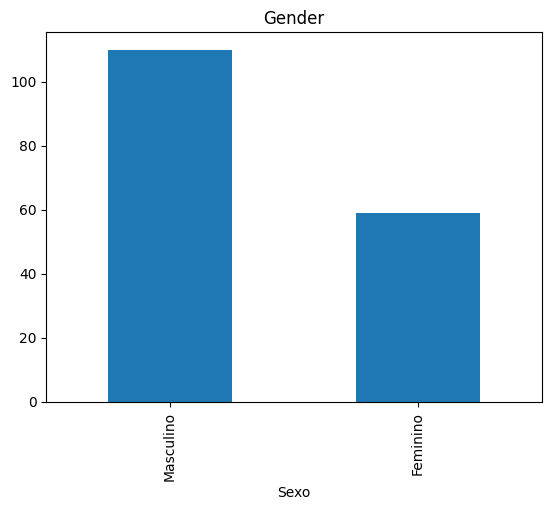

In [15]:
df['Sexo'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Gender")

### Location

In [16]:
df['Localização'].value_counts()

Localização
Uberlândia - MG               20
São Paulo - SP                15
Belo Horizonte - MG            7
Uberlândia- MG                 5
Florianópolis - SC             4
Recife - PE                    4
São Carlos - SP                4
Porto Alegre - RS              3
São Paulo                      3
Uberlândia-MG                  3
Marília - SP                   2
Rio de Janeiro - RJ            2
Lisboa                         2
Salvador- BA                   2
João Pessoa - PB               2
Belém - PA                     2
São Paulo                      2
Curitiba - PR                  2
São Paulo - SP                 2
São José dos Campos - SP       1
Araraquara - SP                1
Urai - PR                      1
Cachoeirinha - RS              1
São Carlos-SP                  1
Campina Grande - Paraíba       1
Lauro de Freitas - BA          1
São Paulo - franca             1
São José dos Campos- SP        1
Araguari MG                    1
Araguari - MG                  

In [17]:
df['Localização'] = df['Localização'].apply(lambda e:
                        'SP - SP' if e in ['São Paulo', 'São Paulo ', 'Sp',
                                           'São Paulo/sp', 'São Paulo - franca',
                                           'São Caetano do Sul','São Paulo - SP',
                                           'São Paulo SP', 'São Paulo SP '] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'DF - DF' if e in ['Brasília '] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'SC - SC' if e in ['SC'] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'MG - MG' if e in ['Belo Horizonte MG', 'Araguari MG',
                                           'Uberlândia MG', 'Minas Gerais  MG',
                                           'Belo Horizonte mg', 'Uberlândia MG ', 'Belo Horizonte mg '] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'PB - PB' if e in ['Campina Grande - Paraíba'] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'CE - CE' if e in ['fortaleza ce'] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'EUROPA - EUROPA' if e in ['Malta - Europa', 'Lisboa', 'Londres - UK'] else e)

df['Localização'] = df['Localização'].apply(lambda e:
                        'PE - PE' if e in ['Recife - Pernambuco'] else e)


In [18]:
df['Localização'] = df['Localização'].apply(
    lambda e: e.split('-')[1].strip().upper() if isinstance(e, str) and '-' in e else e
)

df['Localização']

1          BA
2          MG
3          PR
4          BA
5          MG
6          PR
7          SP
8          DF
9          MG
10         PR
11         SP
12     EUROPA
13         SP
14         PE
15         MT
16         RS
17         AM
18         SP
19         BA
20         MG
21         SP
22         RJ
23         SP
24         PE
25         MG
26         PB
27         SP
28         MG
29         MG
30         RJ
31         MG
32         PT
33         MG
34         SP
35         MG
36         MG
37         MG
38         MG
39         MS
40         PA
41         MG
42         RJ
43         SP
44         MG
45         GO
46         SP
47         AL
48         PA
49         SP
50         SC
51         RJ
52         MG
53         RJ
54         CE
55         SP
56         MG
57         MG
58         SC
59         SP
60         SP
61         MG
62         MG
63         MG
64         MG
65         SC
66         MG
67         SP
68         SP
69         RJ
70         SP
71         SP
72    

In [19]:
df['Localização'].value_counts()

Localização
MG        53
SP        48
SC         9
RJ         7
RS         7
PR         6
CE         6
PE         6
PA         4
PB         4
BA         4
EUROPA     4
DF         4
AM         1
PT         1
MS         1
MT         1
GO         1
AL         1
MA         1
Name: count, dtype: int64

<Axes: title={'center': 'Location'}, xlabel='Localização'>

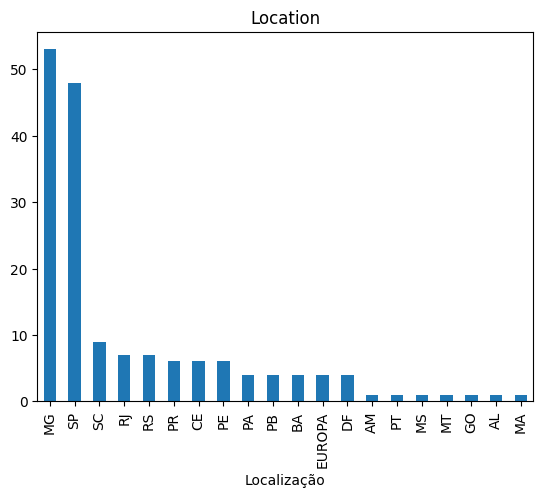

In [20]:
df['Localização'].value_counts().plot(kind='bar', title ="Location")

### Educational Background

In [21]:
df['Formação'].value_counts()

Formação
Ensino Superior Completo      91
Ensino Superior Incompleto    32
Especialista                  30
Mestre                         7
Pós graduação                  2
Pós Graduação incompleta       1
Pós graduação completa         1
Pós-Graduação                  1
Pos-graduação completo         1
Pós-Graduado                   1
Doutor                         1
Pós-Graduação Incompleta       1
Name: count, dtype: int64

In [22]:
df[df['Formação'].str.contains('Incompleta', na=False)]

,Sexo,Localização,Formação,Organização,Experiência,Nível,Certificação,Sempre trabalhou na área,Cargo,Stacks,...,Linguagens de programação,Dificuldades em encontrar materiais de estudo,Fontes de aprendizado,5 habilidades fundamentais para um QA,Atividades desempenhadas,Etapas da Engenharia de Software,Níveis de testes aplicados,Tipos de testes aplicados,"Existem outras atividades, não mencionadas no formulário, que você executa durante o processo de testes de software?","Qual a sua percepção sobre a utilização de assistentes inteligentes e LLMs para geração de dados de teste? Vantagens, desvantagens e ajuda mesmo em cenários com lógicas complexas? Comenta aqui pra gente ;)"
117,Feminino,PB,Pós-Graduação Incompleta,Grande (mais de 499 funcionários),De 1 a 3 anos,"Pleno (atividades específicas, que exigem prof...","Sim, CTFL-AT",Sim,Engenheiro de Qualidade de Software,"Web, Mobile, Oculos de Realidade Aumentada",...,"Java, JavaScript, PHP",Sim,"Canais do Youtube, Cursos (Udemy, plataformas ...","Aprender rápido, Ser comunicativo(a), Ser anal...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Integração e Testes ...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Estático, Manua...",Não,NaN


In [23]:
pos = ['Pós graduação', 'Pós graduação completa', 'Pós-Graduação',
       'Pos-graduação completo','Pós-Graduado', 'Mestre', 'Doutor', 'Pós-Graduação '
       ]



df['Formação'] = df['Formação'].apply(lambda z: return_novo_valor_if_word_in_palavras(z, pos, 'Pós-Graduação'))


# Corrigir lista para evitar espaços extras e variações não cobertas
pos_incompleta = ['Pós Graduação incompleta', 'Pós-Graduação Incompleta', 'Pós-Graduação incompleta']

df['Formação'] = df['Formação'].apply(lambda z: return_novo_valor_if_word_in_palavras(z, pos_incompleta, 'Pós-Graduação Incompleta'))

In [24]:
df[df['Formação'].str.contains('Incompleta', na=False)]

,Sexo,Localização,Formação,Organização,Experiência,Nível,Certificação,Sempre trabalhou na área,Cargo,Stacks,...,Linguagens de programação,Dificuldades em encontrar materiais de estudo,Fontes de aprendizado,5 habilidades fundamentais para um QA,Atividades desempenhadas,Etapas da Engenharia de Software,Níveis de testes aplicados,Tipos de testes aplicados,"Existem outras atividades, não mencionadas no formulário, que você executa durante o processo de testes de software?","Qual a sua percepção sobre a utilização de assistentes inteligentes e LLMs para geração de dados de teste? Vantagens, desvantagens e ajuda mesmo em cenários com lógicas complexas? Comenta aqui pra gente ;)"
7,Feminino,SP,Pós-Graduação Incompleta,Grande (mais de 499 funcionários),De 8 a 11 anos,"Sênior (toma decisões, e age de forma autônoma...",Ctfl,Sim,Analista de Teste,"Web, Mobile",...,"Java, Python, Cypress",Sim,"Canais do Youtube, Artigos acadêmicos, Medium,...","Aprender rápido, Ser analítico, Ser autoconfia...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Projeto do Software,...","Testes de Unidade, Testes de Integração, Teste...","Caixa Preta (Teste Funcional), Caixa Branca (T...",Sim estruturação e entendimento do projeto que...,NaN
117,Feminino,PB,Pós-Graduação Incompleta,Grande (mais de 499 funcionários),De 1 a 3 anos,"Pleno (atividades específicas, que exigem prof...","Sim, CTFL-AT",Sim,Engenheiro de Qualidade de Software,"Web, Mobile, Oculos de Realidade Aumentada",...,"Java, JavaScript, PHP",Sim,"Canais do Youtube, Cursos (Udemy, plataformas ...","Aprender rápido, Ser comunicativo(a), Ser anal...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Integração e Testes ...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Estático, Manua...",Não,NaN


In [25]:
df['Formação'].value_counts()

Formação
Ensino Superior Completo      91
Ensino Superior Incompleto    32
Especialista                  30
Pós-Graduação                 14
Pós-Graduação Incompleta       2
Name: count, dtype: int64

In [26]:
df['Formação']

1        Ensino Superior Completo
2      Ensino Superior Incompleto
3        Ensino Superior Completo
4      Ensino Superior Incompleto
5                    Especialista
6      Ensino Superior Incompleto
7        Pós-Graduação Incompleta
8        Ensino Superior Completo
9                    Especialista
10     Ensino Superior Incompleto
11       Ensino Superior Completo
12       Ensino Superior Completo
13                   Especialista
14       Ensino Superior Completo
15       Ensino Superior Completo
16       Ensino Superior Completo
17                   Especialista
18       Ensino Superior Completo
19     Ensino Superior Incompleto
20       Ensino Superior Completo
21                  Pós-Graduação
22     Ensino Superior Incompleto
23                   Especialista
24                   Especialista
25     Ensino Superior Incompleto
26     Ensino Superior Incompleto
27                   Especialista
28     Ensino Superior Incompleto
29       Ensino Superior Completo
30            

<Axes: title={'center': 'Educational Background'}, xlabel='Formação'>

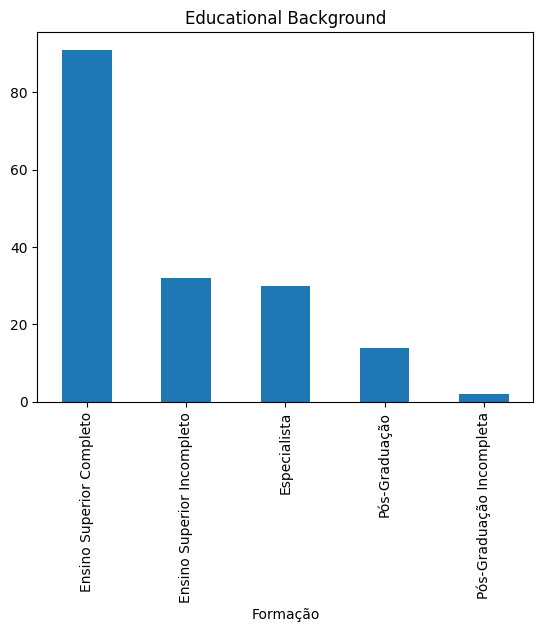

In [27]:
df['Formação'].value_counts().plot(kind='bar', title ="Educational Background")

### Organization

In [28]:
df['Organização'].value_counts()

Organização
Grande (mais de 499 funcionários)    106
Média (até 499 funcionários)          36
Pequena (até 99 funcionários)         20
Micro (até 19 funcionários)            3
suspicios m                            1
Mais de 1000                           1
4000                                   1
0                                      1
Name: count, dtype: int64

In [29]:
df['Organização'] = df['Organização'].apply(lambda e:
                        'Grande (mais de 499 funcionários)' if e in ['Mais de 1000',
                                                                     '4000'] else e)
df['Organização'] = df['Organização'].apply(lambda e:
                        '-' if e in ['suspicios m'] else e)
df['Organização'].value_counts()

df['Organização'] = df['Organização'][df['Organização'] != '0']
df['Organização'] = df['Organização'][df['Organização'] != '-']

<Axes: title={'center': 'Organization'}, xlabel='Organização'>

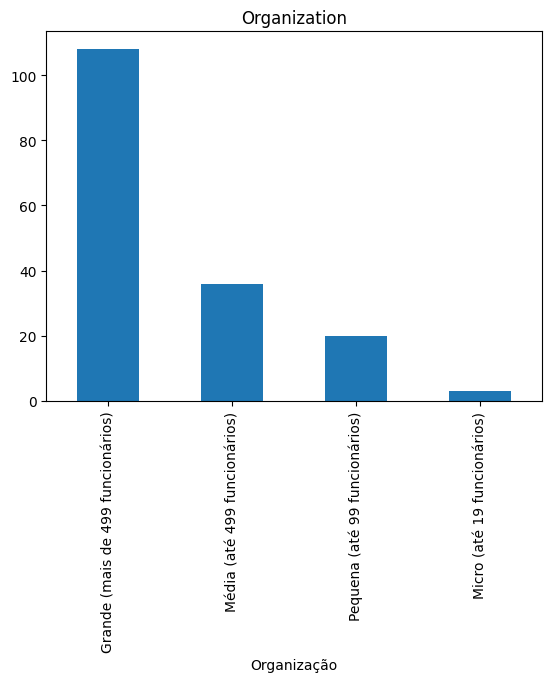

In [30]:
df['Organização'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Organization")

### Experience

In [31]:
less_than_1 = ['faz apenas 5 meses, por conta do mercado aquecido tive oportunidade de virar líder de uma equipe de QAs ']
df['Experiência'] = df['Experiência'].apply(lambda e: return_novo_valor_if_word_in_palavras(e, less_than_1, 'Menos de 1 ano'))

In [32]:
df['Experiência'].value_counts()

Experiência
De 1 a 3 anos       55
De 4 a 7 anos       45
De 8 a 11 anos      36
Menos de 1 ano      21
De 12 a 15 anos      9
Acima de 15 anos     3
Name: count, dtype: int64

<Axes: title={'center': 'Experience'}, xlabel='Experiência'>

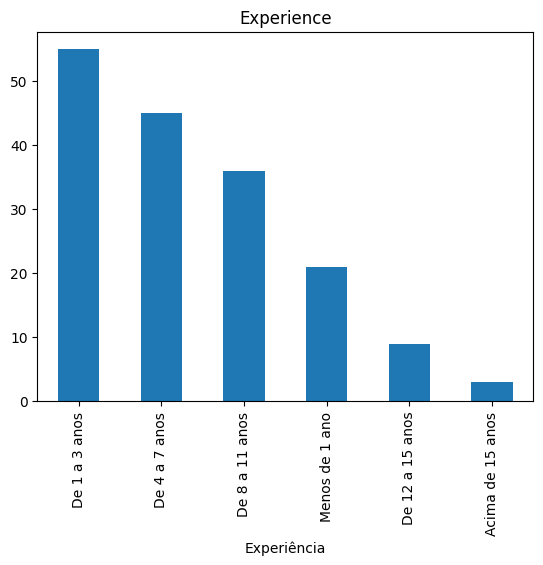

In [33]:
df['Experiência'].value_counts().plot(kind='bar', title ="Experience")

### Level

In [34]:
df['Nível'] = df['Nível'].apply(lambda c: 'Especialista' if 'ESPECIALISTA' in c.upper() else c)
df['Nível'] = df['Nível'].apply(lambda c: 'Pleno' if 'PLENO' in c.upper() else c)
df['Nível'] = df['Nível'].apply(lambda c: 'Sênior' if 'SÊNIOR' in c.upper() else c)
df['Nível'] = df['Nível'].apply(lambda c: 'Júnior' if 'JÚNIOR' in c.upper() else c)

In [35]:
df['Nível']

1             Pleno
2            Júnior
3            Sênior
4            Júnior
5             Pleno
6            Sênior
7            Sênior
8            Sênior
9             Pleno
10     Especialista
11           Sênior
12           Sênior
13           Sênior
14            Pleno
15            Pleno
16           Sênior
17           Sênior
18           Sênior
19           Sênior
20           Sênior
21            Pleno
22           Sênior
23           Sênior
24           Sênior
25            Pleno
26            Pleno
27           Sênior
28           Sênior
29           Sênior
30           Júnior
31           Sênior
32           Sênior
33           Sênior
34            Pleno
35            Pleno
36            Pleno
37           Sênior
38           Júnior
39           Sênior
40            Pleno
41            Pleno
42           Júnior
43           Sênior
44           Júnior
45            Pleno
46            Pleno
47           Júnior
48           Sênior
49            Pleno
50            Pleno


In [36]:
df['Nível'].value_counts()

Nível
Sênior          77
Pleno           58
Júnior          30
Especialista     3
Staff QA         1
Name: count, dtype: int64

<Axes: title={'center': 'Level'}, xlabel='Nível'>

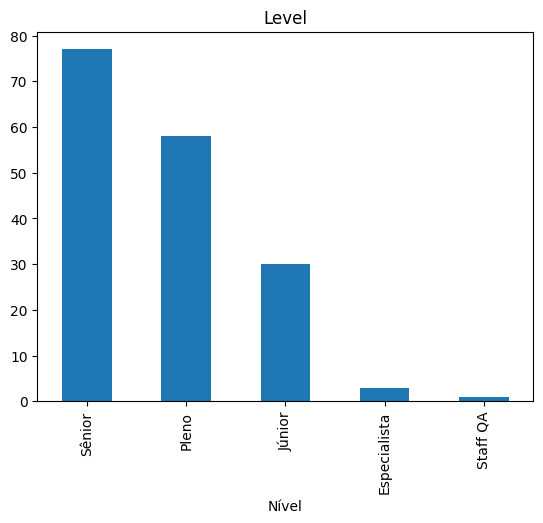

In [37]:
df['Nível'].value_counts().plot(kind='bar', title ="Level")

### Job Attributes

In [38]:
df['Sempre trabalhou na área'] = df['Sempre trabalhou na área'].apply(lambda t: 'Sim' if isinstance(t, str) and 'SIM' in t.upper() else 'Não')
df['Sempre trabalhou na área']

1      Sim
2      Sim
3      Não
4      Sim
5      Não
6      Não
7      Sim
8      Sim
9      Sim
10     Sim
11     Sim
12     Sim
13     Sim
14     Sim
15     Sim
16     Sim
17     Sim
18     Sim
19     Sim
20     Sim
21     Não
22     Sim
23     Sim
24     Sim
25     Sim
26     Sim
27     Sim
28     Sim
29     Não
30     Sim
31     Sim
32     Não
33     Sim
34     Não
35     Sim
36     Sim
37     Sim
38     Sim
39     Sim
40     Não
41     Sim
42     Não
43     Sim
44     Não
45     Sim
46     Sim
47     Não
48     Sim
49     Sim
50     Não
51     Sim
52     Não
53     Sim
54     Sim
55     Não
56     Sim
57     Sim
58     Não
59     Sim
60     Sim
61     Não
62     Sim
63     Sim
64     Não
65     Sim
66     Sim
67     Sim
68     Sim
69     Não
70     Não
71     Não
72     Não
73     Sim
74     Não
75     Não
76     Sim
77     Não
78     Não
79     Não
80     Não
81     Sim
82     Não
83     Não
84     Sim
85     Não
86     Sim
87     Sim
88     Não
89     Sim
90     Não
91     Sim

In [39]:
df['Sempre trabalhou na área'].value_counts()

Sempre trabalhou na área
Sim    114
Não     55
Name: count, dtype: int64

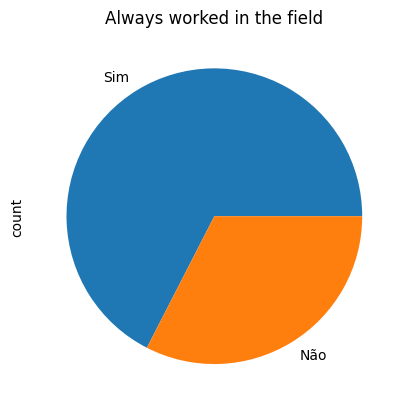

In [40]:
ax = df['Sempre trabalhou na área'].value_counts().plot(kind='pie', title ="Always worked in the field")

### Position

In [41]:
df['Cargo'].value_counts()

Cargo
Quality Assurance - QA                                58
Analista de Teste                                     47
Engenheiro de Qualidade de Software                   33
Analista de Automação de Testes                        8
Software Development Engineer In Test - SDET           7
Quality engineer (QE)                                  1
Staff QA                                               1
QA Automatizador                                       1
Head of IT Quality                                     1
Tudo isso misturado                                    1
líder de analista de teste de software                 1
Team Lead de Quality Assistances                       1
Quality Assurance - QA e Analista de Teste             1
Especialista de qualidade                              1
Especialista Quality Assurance                         1
Analista de qualidade                                  1
Especialista em Qualidade de Software                  1
Automation Enginner SR   

<Axes: title={'center': 'Position'}, xlabel='Cargo'>

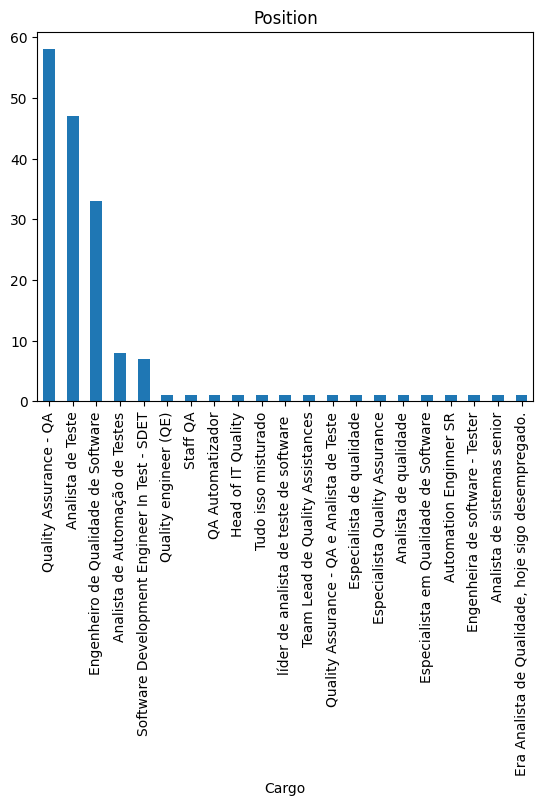

In [42]:
df['Cargo'].value_counts().plot(kind='bar', title ="Position")

### Stacks

In [43]:
given_df_col_return_split_values(df['Stacks'], 'Stacks').value_counts()

Stacks
Web                                                        151
Backend                                                    111
Mobile                                                     108
Desktop                                                      7
Web tenho tido pouca iteração                                1
pentest                                                      1
Performance                                                  1
Games e Simuladores                                          1
performance                                                  1
Hardware                                                     1
                                                             1
FullStack                                                    1
outros                                                       1
Oculos de Realidade Aumentada                                1
Embarcados                                                   1
pois maioria das funcionalidades tem sido "Mobil

In [44]:
desk = ['Desktop',
        'desktop'
]

remover = ['pois maioria das funcionalidades tem sido "Mobile Only"',
           'Web tenho tido pouca iteração', 'outros',
           ''
]

embarcados = ['Embarcados',
              'Embarcados (C)'

]

performance = ['Performance',
              'performance',
              'carga/performance'
]

front = ['Front também.',
         'Frontend'
         ]

segurança = ['seguranca',
             'pentest',

             ]

value_stacks = given_df_col_return_split_values(df['Stacks'], 'Stacks')

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, desk, 'Desktop'))

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, remover, 'Remover'))

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, performance, 'Performance'))

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, front, 'Front-end'))

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, embarcados, 'Embarcados'))

value_stacks = value_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, segurança, 'Segurança'))


In [45]:
# df['Stacks'] = value_stacks

In [46]:
value_stacks.value_counts()

Stacks
Web                              151
Backend                          111
Mobile                           108
Desktop                            8
Remover                            4
Performance                        3
Segurança                          3
Embarcados                         2
Front-end                          2
Hardware                           1
FullStack                          1
Oculos de Realidade Aumentada      1
Acessibilidade                     1
QA Coach                           1
ATM                                1
API REST                           1
Hardware e Firmware                1
mutacao                            1
Games e Simuladores                1
Name: count, dtype: int64

In [47]:
df['Stacks']

1                                            Web, Mobile
2                                                    Web
3                                                    Web
4                                            Web, Mobile
5                                   Web, Mobile, Backend
6                                   Web, Mobile, Backend
7                                            Web, Mobile
8                                   Web, Mobile, Backend
9                                                    Web
10     Web, Mobile, Backend, mutacao, carga/performan...
11                                                   Web
12                                  Web, Mobile, Backend
13                                  Web, Mobile, Backend
14                                                   Web
15                                          Web, Backend
16                                  Web, Mobile, Backend
17     Web, Mobile, Backend, Desktop, Hardware e Firm...
18                             

In [48]:
value_stacks

0                                Web
1                             Mobile
2                                Web
3                                Web
4                                Web
5                             Mobile
6                                Web
7                             Mobile
8                            Backend
9                                Web
10                            Mobile
11                           Backend
12                               Web
13                            Mobile
14                               Web
15                            Mobile
16                           Backend
17                               Web
18                               Web
19                            Mobile
20                           Backend
21                           mutacao
22                       Performance
23                         Segurança
24                               Web
25                               Web
26                            Mobile
2

<Axes: title={'center': 'Stacks'}, xlabel='Stacks'>

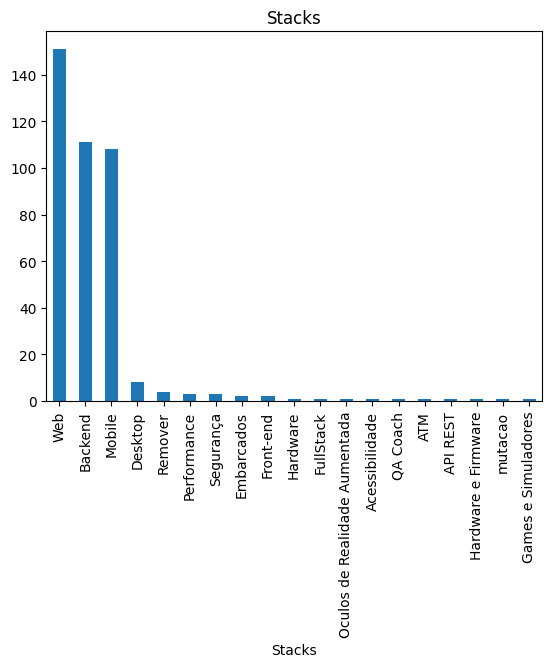

In [49]:
value_stacks.value_counts().plot(kind='bar', title ="Stacks")

### Cerifificações

In [50]:
df['Certificação']

1                                                   cTFL
2                                                   Nao7
3                                                    Sim
4                                              Sim, CTFL
5                               Não possuo certificação 
6                                                    Não
7                                                   Ctfl
8                                                    Não
9                                                   Não 
10                                                   nao
11                                                   Sim
12                                                   Não
13                                   Sim, CTFL, CTFL-AT 
14                                                   Não
15                                                   Não
16                                                   Não
17                                             Sim, CTFL
18                             

In [51]:
df['Certificação'].value_counts()

Certificação
Não                                                                                  67
Não                                                                                  18
Sim, CTFL                                                                            10
Nao                                                                                   5
Sim                                                                                   5
CTFL                                                                                  5
nao                                                                                   4
Sim. CTFL                                                                             4
não                                                                                   4
Sim, CTFL, CTFL-AT                                                                    2
Sim, CTFL.                                                                            2
Sim CTFL           

In [52]:
# df['Definição de [Engano]']

In [53]:
strings = [
    "CTFL", 'Sim ',
    "Sim",
    "Sim, CTFL",
    "Sim. CTFL ",
    "Sim, CTFL.",
    "Sim CTFL",
    "Sim, CTFL, CTFL-AT ",
    "SIM - CTFL/ CTFL - AT",
    "Sim. CTFL",
    "Sim. TMap e CTFL",
    "Sim. Ctfl",
    "Sim Itil e psm I",
    "Sim, CTFL Foundation",
    "Sim - CTFL",
    "sim, tenho um certificado da usp de introdução ao teste de software ",
    "Sim, CTFL-AT",
    "Sim. CTFL Foundation Level",
    "Sim. CTFL, CTAL-AT, CTAL-TAE",
    "Sim. CTFL, CTAL-TM",
    "Sim: Processos Scrum; Programação básica.",
    "Sim. CTFL e AWS Practitioner",
    "CTFL, CTFL AT e CTALTAE",
    "CTFL, CTFL-PT, CTFL-AT",
    "Sim (CTFL, CTFL-AT, CTFL-AcT, CTFL-UT)",
    "CTFL / CTFL AT",
    "CTFL (Certified Tester Foundation Level)",
    "Sim, ctfl",
    "Sim teste de software e automação ",
    "Sim (CTFL)",
    "Sim. Em vários cursos feitos incluindo o do Júlio de Lima, Cypress e JavaScript",
    "CTFL, CTFL-AT",
    "Sim. CTFL e CTFL AT",
    "Sim (CTFL, CTFL-AT, CTAL-TA, CTAL-TM, CTAL-TTA)",
    "Sim. CTFL, Automação do Zero, Setting a Foundation for Successful Test Automation",
    "Sim. CTAL-TA, CTAL-TM",
    "Sim. CTFL, CTFL-AT ",
    "Sim, ctfl e ctal-tm",
    "Sim, ctrl, ctfl-at, ctfl-pt",
    "Sim, possuo a CTFL",
    "ISTQB", 'Sim. CTFL, CTFL-AT'
]

df['Certificação'] = df['Certificação'].apply(lambda c: return_novo_valor_if_word_in_palavras(c, strings, 'Sim'))

df['Certificação'] = df['Certificação'].apply(lambda c: return_novo_valor_if_word_in_palavras(c, ["NÃO", "NAO", 'Não ', 'Nao ', 'Nao7', ' Não', 'Não possuo certificação ', 'Não.'], 'Não'))

In [54]:
# engano = "Ação incorreta tomada pelo programador"
# defeito = "Passo, processo ou definição de dados incorreto, uma instrução ou comando incorreto"
# erro = "Saída incorreta com relação à especificação"
# falha = "Qualquer estado intermediário incorreto ou resultado inesperado na execução do programa"

# def definicao_trat(definicao, res_correto):
#   if definicao == "Não sei informar":
#     return 'Neutro'
#   return 'Correto' if (definicao == res_correto) else 'Errado'


# df['Definição de [Engano]'] = df['Definição de [Engano]'].apply(lambda d: definicao_trat(d, engano))
# df['Definição de [Defeito]'] = df['Definição de [Defeito]'].apply(lambda d: definicao_trat(d, defeito))
# df['Definição de [Erro]'] = df['Definição de [Erro]'].apply(lambda d: definicao_trat(d, erro))
# df['Definição de [Falha]'] = df['Definição de [Falha]'].apply(lambda d: definicao_trat(d, falha))

In [55]:
# df['Definição de [Engano]'].value_counts()

In [56]:
df['Certificação'].value_counts()

Certificação
Não    104
Sim     65
Name: count, dtype: int64

<Axes: title={'center': 'Certificações'}, xlabel='Certificação'>

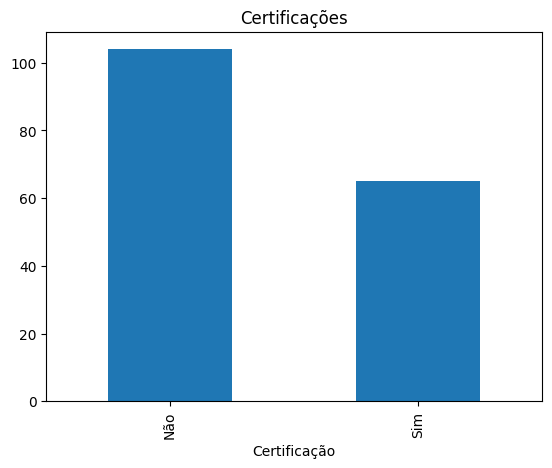

In [57]:
df['Certificação'].value_counts().plot(kind='bar', title ="Certificações")

In [58]:
junior = df.query("Nível == 'Júnior'")
senior = df.query("Nível == 'Sênior'")
pleno = df.query("Nível == 'Pleno'")

### Programming Languages

In [59]:
nones_lang = ['Não utilizei', 'nenhuma', 'Nunca utilizei', 'Nenhum', 'Não utilizo']
df['Linguagens de programação'] = df['Linguagens de programação'].apply(lambda r: return_novo_valor_if_word_in_palavras(r, nones_lang, 'Nenhuma'))



In [60]:
given_df_col_return_split_values(df['Linguagens de programação'], 'Linguagens de programação').value_counts()

Linguagens de programação
Java                                              117
JavaScript                                         90
Python                                             75
Ruby                                               46
C#                                                 35
Kotlin                                             18
Nenhuma                                             6
Swift                                               3
PHP                                                 2
Object C                                            1
Groovy                                              1
Não utilizo                                         1
scala                                               1
C++                                                 1
Labview                                             1
Shellscript                                         1
C/C++                                               1
Testes Manuais                                      1
Pr

### Back-End Tools

In [61]:
back_end = given_df_col_return_split_values(df['Ferramentas [Back-end]'], 'Ferramentas [Back-end]')


In [62]:
back_end

0      Uso estritamente manual com Postman
1                                HTTPParty
2                          Robot Framework
3                    Automação com Postman
4                                HTTPParty
5                                   Nenhum
6                    Automação com Postman
7                          Robot Framework
8                    Automação com Postman
9                          Robot Framework
10                                 Rest C#
11                   Automação com Postman
12     Uso estritamente manual com Postman
13                   Automação com Postman
14     Uso estritamente manual com Postman
15                            REST Assured
16                         Robot Framework
17                   Automação com Postman
18     Uso estritamente manual com Postman
19                            REST Assured
20                               HTTPParty
21                         Robot Framework
22                            REST Assured
23     Uso 

In [63]:
back_end.value_counts()

Ferramentas [Back-end]
Automação com Postman                  98
Uso estritamente manual com Postman    84
REST Assured                           74
Robot Framework                        40
HTTPParty                              34
Nenhuma                                 3
Supertest                               3
Insomnia                                3
Cypress                                 3
Nenhum                                  3
RestSharp                               2
Karate DSL                              2
SuperTest                               1
Nao usei                                1
Flurl                                   1
gatling                                 1
locust                                  1
HttpClient                              1
Não uso                                 1
ReadyAPI                                1
Não faco testes api                     1
Não tenho                               1
Karate                                  1
Nunca reali

In [64]:
back_end = back_end.apply(lambda c:
                                                                  return_novo_valor_if_word_in_palavras(c, ['Nenhum', 'Nao usei',
                                                                  'Nunca realizei testes BE',
                                                                  'Não tenho', 'Não faco testes api',
                                                                  'Não uso', 'Nunca utilizaei',
                                                                  'nenhuma' 'Não utilizei ', 'Não possuo',
                                                                  'Não tenho ', 'nenhuma ', 'Não utilizei'], 'Nenhuma'))



<Axes: title={'center': 'Back-End Tools'}, xlabel='Ferramentas [Back-end]'>

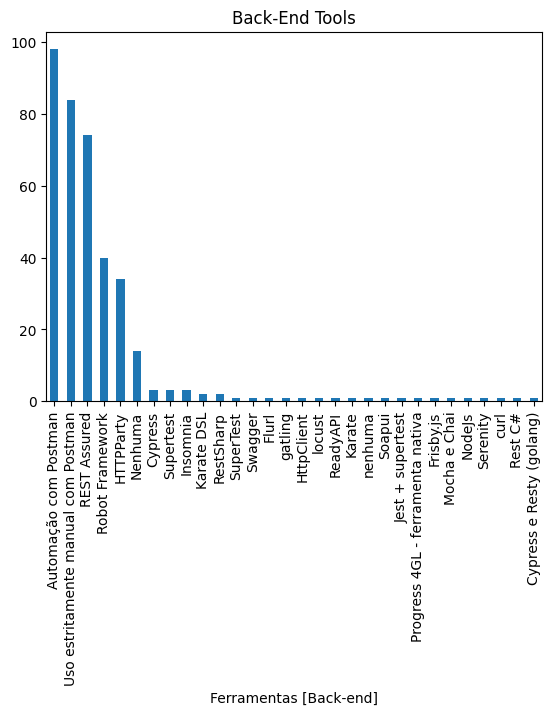

In [65]:
back_end.value_counts().plot(kind='bar', title ="Back-End Tools")

In [66]:
back_end.value_counts()

Ferramentas [Back-end]
Automação com Postman                  98
Uso estritamente manual com Postman    84
REST Assured                           74
Robot Framework                        40
HTTPParty                              34
Nenhuma                                14
Cypress                                 3
Supertest                               3
Insomnia                                3
Karate DSL                              2
RestSharp                               2
SuperTest                               1
Swagger                                 1
Flurl                                   1
gatling                                 1
HttpClient                              1
locust                                  1
ReadyAPI                                1
Karate                                  1
nenhuma                                 1
Soapui                                  1
Jest + supertest                        1
Progress 4GL - ferramenta nativa        1
Frisby.js  

In [67]:
nones = ['Nenhuma', 'Nao usei', 'Nunca realizei testes BE', 'Não tenho ', 'Nenhum', 'Não uso', 'Nunca utilizaei', 'Não faco testes api', 'Não utilizei', 'Não possuo']
karate = ['Karate DSL', 'Karate']



back_end = back_end.apply(lambda r: return_novo_valor_if_word_in_palavras(r, nones, 'Nenhuma'))
back_end = back_end.apply(lambda r: return_novo_valor_if_word_in_palavras(r, karate, 'Karate'))

In [68]:
df['Ferramentas [Back-end]']

1      Uso estritamente manual com Postman, HTTPParty...
2                                  Automação com Postman
3                                              HTTPParty
4                                                 Nenhum
5                 Automação com Postman, Robot Framework
6        Automação com Postman, Robot Framework, Rest C#
7      Automação com Postman, Uso estritamente manual...
8      Automação com Postman, Uso estritamente manual...
9                                        Robot Framework
10     Automação com Postman, Uso estritamente manual...
11                                          REST Assured
12     Uso estritamente manual com Postman, REST Assu...
13     Automação com Postman, REST Assured, Robot Fra...
14        Automação com Postman, REST Assured, HTTPParty
15     Uso estritamente manual com Postman, REST Assured
16     Automação com Postman, Uso estritamente manual...
17     Automação com Postman, Uso estritamente manual...
18     Automação com Postman, U

In [69]:
back_end.value_counts()

Ferramentas [Back-end]
Automação com Postman                  98
Uso estritamente manual com Postman    84
REST Assured                           74
Robot Framework                        40
HTTPParty                              34
Nenhuma                                15
Cypress                                 3
Supertest                               3
Insomnia                                3
Karate                                  3
RestSharp                               2
SuperTest                               1
Swagger                                 1
Flurl                                   1
HttpClient                              1
gatling                                 1
locust                                  1
ReadyAPI                                1
Frisby.js                               1
Soapui                                  1
Jest + supertest                        1
Progress 4GL - ferramenta nativa        1
Mocha e Chai                            1
NodeJs     

<Axes: xlabel='Ferramentas [Back-end]'>

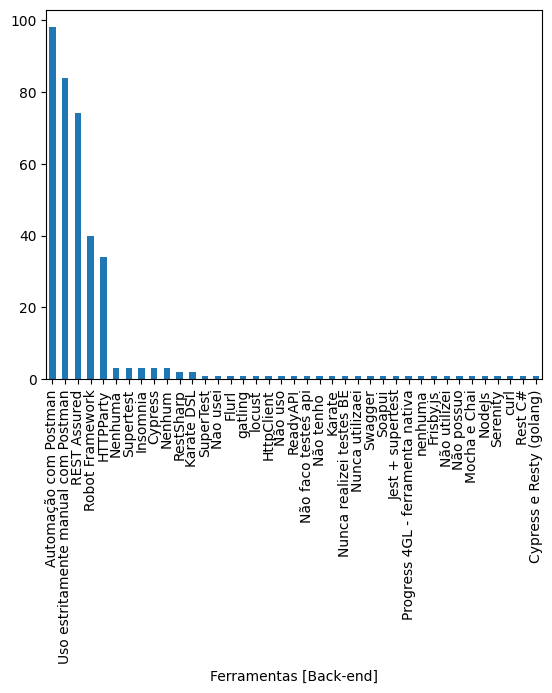

In [70]:
given_df_col_return_split_values(df['Ferramentas [Back-end]'], '[Back-End] Tools').value_counts().plot(kind = 'bar')

### Mobile Tools

In [71]:
df['Ferramentas [Mobile]'].value_counts()

Ferramentas [Mobile]
Apium                                                             90
Nenhuma                                                           10
Apium, Espresso                                                    7
Nenhum                                                             6
Apium, XCUITest                                                    6
Apium, Espresso, XCUITest                                          3
XCUITest                                                           2
Apium, Espresso, XCUITest, Calabash                                2
Espresso                                                           1
Framework proprietario                                             1
Nunca realizei testes mobile                                       1
Nunca testei mobile.                                               1
Apium, Espresso, Appium*                                           1
Nunca utilizei nada para testar mobile.                            1
Não utilizo a

In [72]:
df['Ferramentas [Mobile]']

1                                                  Apium
2                                                  Apium
3                                                  Apium
4                                                Nenhum 
5                                       Flutter driver, 
6                                                  Apium
7      Não utilizo ferramentas para teste mobile atua...
8                                                  Apium
9                                          Nenhum desses
10                                       Apium, XCUITest
11                                                 Apium
12                                                 Apium
13                                                 Apium
14                                                 Apium
15                                                 Apium
16                                       Apium, Espresso
17               Apium, Robotium, Calabash, UI automator
18                             

In [73]:
given_df_col_return_split_values(df['Ferramentas [Mobile]'], '[Mobile] Tools')

0                                                  Apium
1                                                  Apium
2                                                  Apium
3                                                Nenhum 
4                                         Flutter driver
5                                                       
6                                                  Apium
7      Não utilizo ferramentas para teste mobile atua...
8                                                  Apium
9                                          Nenhum desses
10                                                 Apium
11                                              XCUITest
12                                                 Apium
13                                                 Apium
14                                                 Apium
15                                                 Apium
16                                                 Apium
17                             

In [74]:
mobile_df = given_df_col_return_split_values(df['Ferramentas [Mobile]'], '[Mobile] Tools')

mobile_df = mobile_df[mobile_df != 'Appium*']
mobile_df = mobile_df[mobile_df != 'Device']

In [75]:
nones = ['Nenhuma', 'Nenhum', 'Nunca testei mobile pra valer, só exercitei a aplicação.',
        'Nunca usei', 'Nunca testei mobile.', 'Nunca realizei testes mobile',
        'nunca utilizei',  'Nunca utilizei nada para testar mobile.', 'Não utilizo automação',
        'Não uso', 'não sei', 'Não possuo experiência', 'Não utilizei', 'nenhuma',
        'nenhuma dessas', 'Nenhum', 'Não tenho experiência em teste de aplicações mobile',
        'Manual',
        'Não testei mobile com ferramenta', 'Nenhum desses', 'Não utilizo ferramentas para teste mobile atualmente.',
        'Não usei', 'N fiz testes mobile', 'Nenhum ', 'Não utilizo automação ', 'Não utilizo ', 'só exercitei a aplicação.','Nunca testei mobile pra valer',
        'Nunca testei mobile pra valer'
        ]



mobile_df = mobile_df.apply(lambda r: return_novo_valor_if_word_in_palavras(r, nones, 'Nenhuma'))
mobile_df = mobile_df.apply(lambda r: return_novo_valor_if_word_in_palavras(r, ['Flutter driver'], 'Flutter driver'))
mobile_df = mobile_df.apply(lambda r: return_novo_valor_if_word_in_palavras(r, ['Android studio', 'JMeter para testar endpoints mobile e o próprio android studio'] , 'Android Studio'))


In [76]:
mobile_df

0                       Apium
1                       Apium
2                       Apium
3                     Nenhuma
4              Flutter driver
5                            
6                       Apium
7                     Nenhuma
8                       Apium
9                     Nenhuma
10                      Apium
11                   XCUITest
12                      Apium
13                      Apium
14                      Apium
15                      Apium
16                      Apium
17                      Apium
18                   Espresso
19                      Apium
20                   Robotium
21                   Calabash
22               UI automator
23                      Apium
24                      Apium
25                    Nenhuma
26                    Nenhuma
27                      Apium
28                      Apium
29                    Nenhuma
30                      Apium
31                      Apium
32                      Apium
33        

In [77]:
mobile_df.value_counts()

Ferramentas [Mobile]
Apium                     112
Nenhuma                    40
XCUITest                   16
Espresso                   15
Calabash                    3
Android Studio              2
Flutter driver              1
                            1
Robotium                    1
UI automator                1
UiAutomation                1
robotframework              1
Testes Manuais              1
Framework proprietario      1
UIAutomator2                1
Name: count, dtype: int64

<Axes: xlabel='Ferramentas [Mobile]'>

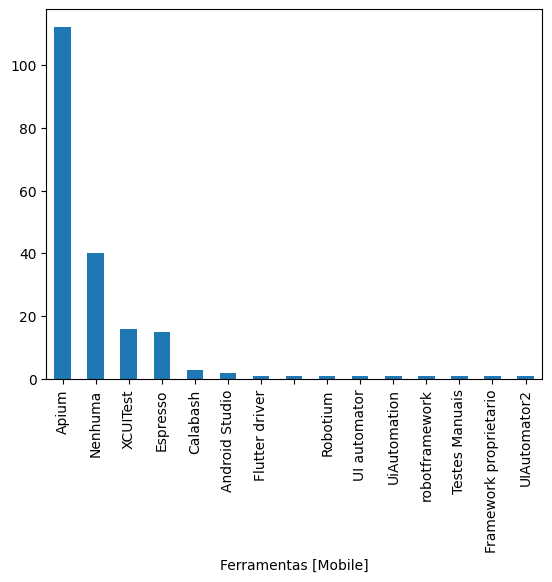

In [78]:
mobile_df.value_counts().plot(kind='bar')

### Front-End Tools

In [79]:
nones = ['Nenhuma', 'Nenhum', 'Nunca utilizei',
        'nenhuma', 'Não utilizo automação', 'Nunca realizei testes web',
        'Não utilizei',  'Não possuo experiência em testes automatizados', 'Não utilizo '
        ]
df['Ferramentas [Front-end]'] = df['Ferramentas [Front-end]'].apply(lambda f: return_novo_valor_if_word_in_palavras(f, nones, 'Nenhuma'))
df['Ferramentas [Front-end]'] = df['Ferramentas [Front-end]'].apply(lambda f: return_novo_valor_if_word_in_palavras(f, ['Puppeteer', 'Puppeter'], 'Puppeter'))

given_df_col_return_split_values(df['Ferramentas [Front-end]'], '[Front-end] Tools').value_counts()

Ferramentas [Front-end]
Selenium          138
Cypress            77
Robotframework     62
Capybara           42
Protractor         20
Nenhuma            13
Playwright          8
Cucumber            2
TestCafe            2
Nunit e Junit       1
TestComplete        1
PhpBehat            1
BackstopJS          1
Puppeter            1
CyPress             1
PlayWrigth          1
opentest            1
Lean-FT             1
Pytest-BDD          1
golang              1
Webdriver.io        1
CasperJS            1
Puppeteer           1
Taiko               1
UFT                 1
Watir               1
JMeter              1
Name: count, dtype: int64

<Axes: xlabel='Ferramentas [Front-end]'>

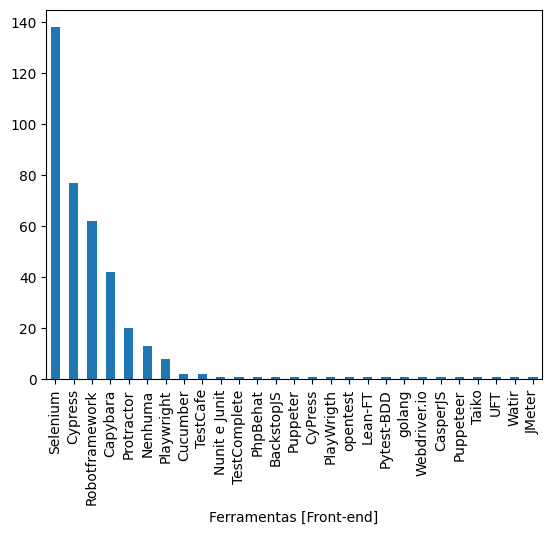

In [191]:
given_df_col_return_split_values(df['Ferramentas [Front-end]'], '[Front-End] Tools').value_counts().plot(kind = 'bar')

### Difficulty Finding Study Materials

In [80]:
sims = ['Depende do assunto', # se depende do assunto ent teve dificuldade qnd aprendendo
       'Dificuldade início de carreira de um mentor para orientar o que estudar ',
       'Automação em geral ',
       'No início da minha carreira em qualidade de software, tive bastante dificuldade. Mas de uns anos pra cá, ficou bem mais fácil.',
       'Tratando se de materiais em português, sim. Considerando materiais de outros idiomas, não.'
        # quer dizer q ele procurou material em pt, e sentiu dificuldade nesse sentido
]
df['Dificuldades em encontrar materiais de estudo'] = df['Dificuldades em encontrar materiais de estudo'].apply(lambda d: return_novo_valor_if_word_in_palavras(d, sims, 'Sim'))
df['Dificuldades em encontrar materiais de estudo'].value_counts()

Dificuldades em encontrar materiais de estudo
Não    85
Sim    84
Name: count, dtype: int64

<Axes: xlabel='Dificuldades em encontrar materiais de estudo'>

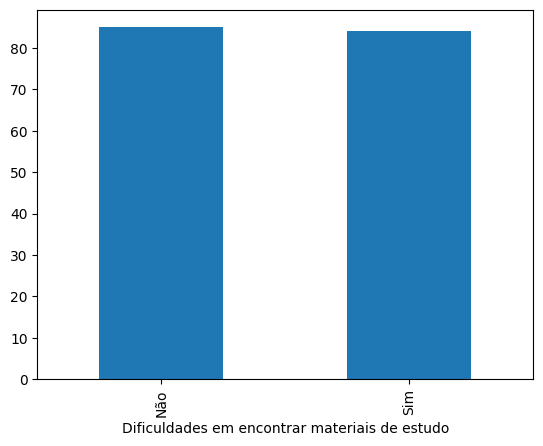

In [81]:
df['Dificuldades em encontrar materiais de estudo'].value_counts().plot(kind='bar')

### Learning Sources

In [82]:
given_df_col_return_split_values(df['Fontes de aprendizado'], 'Learning Sources').value_counts()

Fontes de aprendizado
Cursos (Udemy                                     147
plataformas online)                               147
Canais do Youtube                                 142
Sigo referências em teste de software             113
Medium                                             94
Artigos acadêmicos                                 48
Livros                                             41
eventos                                             1
e outras plataformas                                1
Stack Overflow                                      1
Curso linkedin                                      1
Mentoria direcionada para a área.                   1
Inteligência artificial                             1
Documentação da ferramenta                          1
blogs                                               1
Grupos de whatsapp                                  1
Comunidades no discord                              1
instagram                                           1
Linked

<Axes: xlabel='Fontes de aprendizado'>

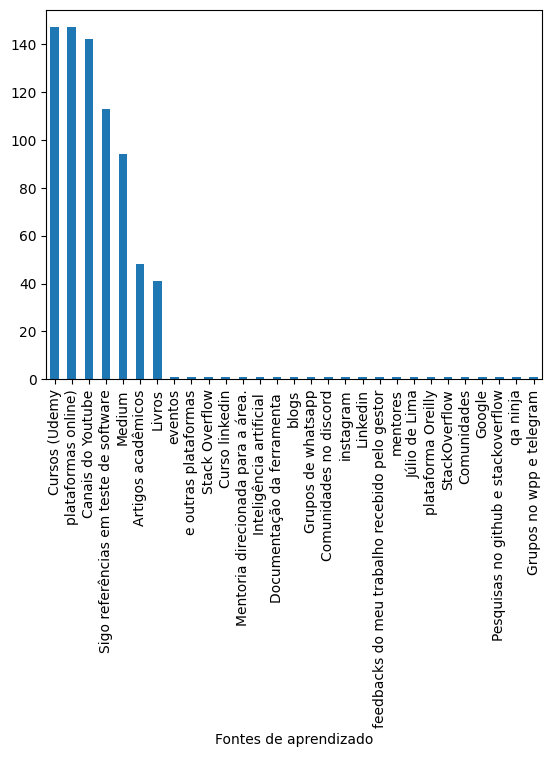

In [83]:
given_df_col_return_split_values(df['Fontes de aprendizado'], 'Learning Sources').value_counts().plot(kind='bar')

In [84]:
df_fontes_de_aprendizado = given_df_col_return_split_values(df['Fontes de aprendizado'], 'Learning Sources')

In [85]:
df_fontes_de_aprendizado

0                                   Canais do Youtube
1                                              Medium
2                                       Cursos (Udemy
3                                 plataformas online)
4               Sigo referências em teste de software
5                                              Livros
6                                       Cursos (Udemy
7                                 plataformas online)
8               Sigo referências em teste de software
9                                              Livros
10                                  Canais do Youtube
11                                      Cursos (Udemy
12                                plataformas online)
13              Sigo referências em teste de software
14                                  Canais do Youtube
15                                      Cursos (Udemy
16                                plataformas online)
17              Sigo referências em teste de software
18                          

In [86]:
df_fontes_de_aprendizado = df_fontes_de_aprendizado.apply(lambda d: return_novo_valor_if_word_in_palavras(d, ['Grupos de whatsapp', 'Grupos no wpp e telegram', 'instagram', 'Linkedin', 'Comunidades no discord', 'Sigo referências em teste de software', 'Comunidades', 'qa ninja'], 'Comunidades e redes sociais'))
df_fontes_de_aprendizado = df_fontes_de_aprendizado.apply(lambda d: return_novo_valor_if_word_in_palavras(d, ['plataformas online)', 'e outras plataformas', 'Curso linkedin', 'plataforma Oreilly', 'Júlio de Lima'], 'Plataformas online'))
df_fontes_de_aprendizado = df_fontes_de_aprendizado.apply(lambda d: return_novo_valor_if_word_in_palavras(d, ['Stack Overflow', 'Pesquisas no github e stackoverflow', 'Google', 'blogs', 'StackOverflow'], 'Pesquisas no Google, Github ou Stack Overflow'))
df_fontes_de_aprendizado = df_fontes_de_aprendizado.apply(lambda d: return_novo_valor_if_word_in_palavras(d, ['Mentoria direcionada para a área.', 'mentores', 'feedbacks do meu trabalho recebido pelo gestor'], 'Mentoria Orientada'))

df_fontes_de_aprendizado = df_fontes_de_aprendizado[df_fontes_de_aprendizado != 'Cursos (Udemy']


In [87]:
df_fontes_de_aprendizado.value_counts()

Fontes de aprendizado
Plataformas online                               151
Canais do Youtube                                142
Comunidades e redes sociais                      120
Medium                                            94
Artigos acadêmicos                                48
Livros                                            41
Pesquisas no Google, Github ou Stack Overflow      5
Mentoria Orientada                                 3
eventos                                            1
Inteligência artificial                            1
Documentação da ferramenta                         1
Name: count, dtype: int64

In [88]:
df['Fontes de aprendizado'] = df_fontes_de_aprendizado

<Axes: xlabel='Fontes de aprendizado'>

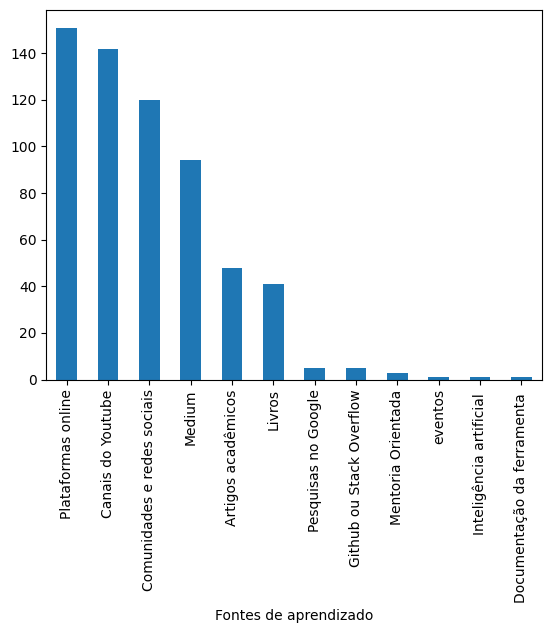

In [192]:
given_df_col_return_split_values(df_fontes_de_aprendizado, 'Learning Sources').value_counts().plot(kind='bar')

### Five fundamental skills

There were participants who scored more than 5 skills

In [89]:
given_df_col_return_split_values(df['5 habilidades fundamentais para um QA'], 'Five fundamental skills').value_counts()

5 habilidades fundamentais para um QA
Ser comunicativo(a)              119
Pensar como técnico e usuário    116
Ser analítico                    111
Ser detalhista                   100
Ser curioso                       96
Ser proativo                      86
Ser investigador                  85
Possuir conhecimento técnico      66
Aprender rápido                   60
Ter empatia                       50
Ser flexível                      47
Sabe escutar                      42
Ser autoconfiante                 14
Ser organizado                     1
Saber utilizar a IA                1
Name: count, dtype: int64

<Axes: xlabel='5 habilidades fundamentais para um QA'>

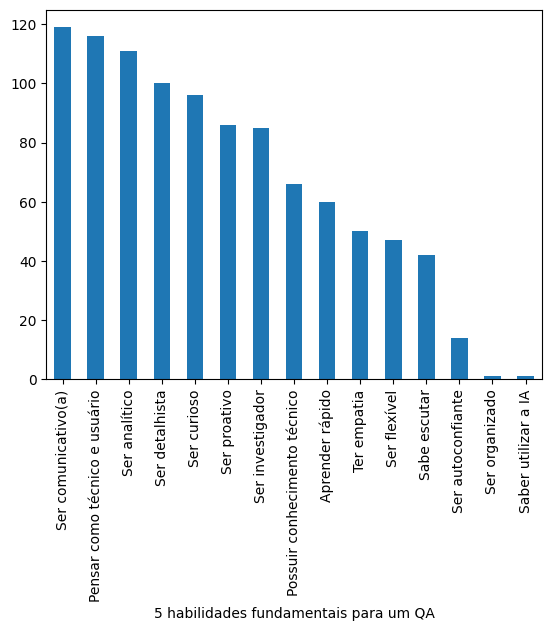

In [196]:
given_df_col_return_split_values(df['5 habilidades fundamentais para um QA'], 'skills').value_counts().plot(kind='bar')

### Activities Performed

In [90]:
given_df_col_return_split_values(df['Atividades desempenhadas'], 'Activities Performed').value_counts()

Atividades desempenhadas
Avaliar e garantir que os requisitos sejam atendidos                                                                                                128
Reportar erros e defeitos                                                                                                                           120
Executar diferentes níveis e tipos de teste                                                                                                         108
Escrever e definir cenários de teste                                                                                                                106
Apoiar e estabelecer padrões de qualidade                                                                                                            99
Realizar automação dos testes                                                                                                                        97
Propor melhorias no produto e/ou processo desenvolvimento      

<Axes: xlabel='Atividades desempenhadas'>

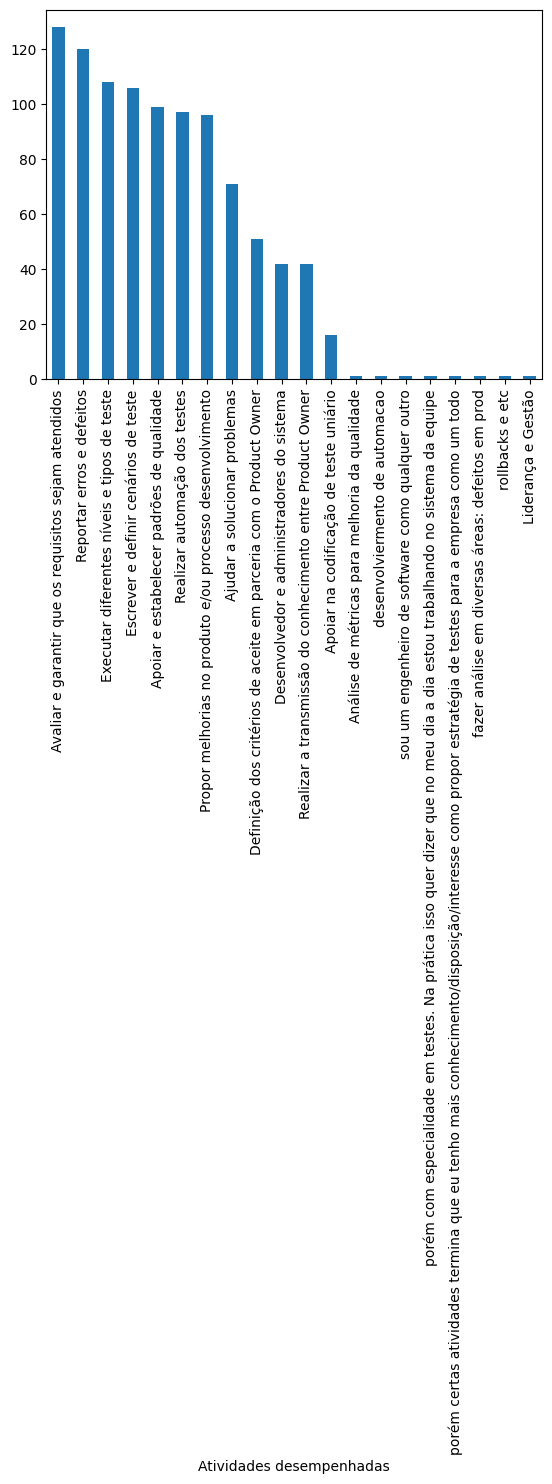

In [195]:
given_df_col_return_split_values(df['Atividades desempenhadas'], '').value_counts().plot(kind='bar')

### Software Engineering Stages

In [91]:
given_df_col_return_split_values(df['Etapas da Engenharia de Software'], 'Software Engineering Stages').value_counts()

Etapas da Engenharia de Software
Integração e Testes do Sistema       150
Definição dos Requisitos             112
Projeto do Software                   88
Operação e Manutenção                 87
Implementação e Testes de Unidade     57
Name: count, dtype: int64

<Axes: xlabel='Etapas da Engenharia de Software'>

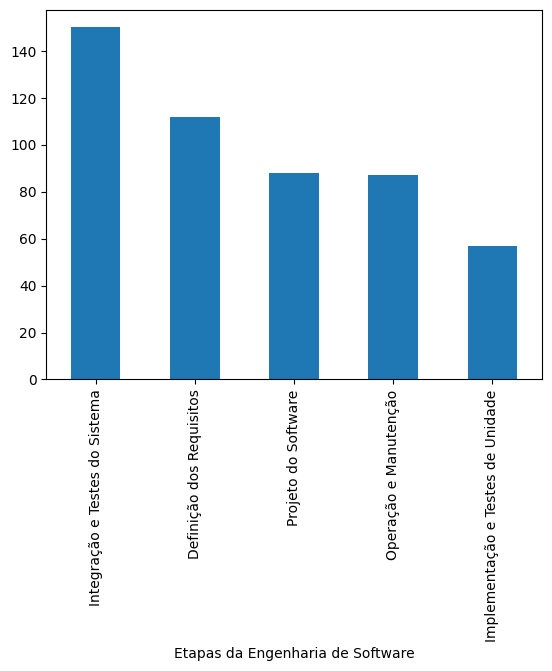

In [197]:
given_df_col_return_split_values(df['Etapas da Engenharia de Software'], '').value_counts().plot(kind='bar')

### Levels of the tests applied

In [92]:
given_df_col_return_split_values(df['Níveis de testes aplicados'], 'Levels of the tests applied').value_counts()

Níveis de testes aplicados
Testes de Regressão            146
Testes de Sistema              145
Testes de Integração           128
Testes de Aceite               128
Testes de Unidade               47
Performance                      3
Acessibilidade                   2
Testes de regressão visuais      1
testes de performance            1
Não funcionais.                  1
Contrato                         1
Testes funcionais                1
Stress                           1
API                              1
Regressão não é nível            1
Segurança                        1
A/B                              1
Name: count, dtype: int64

<Axes: xlabel='Níveis de testes aplicados'>

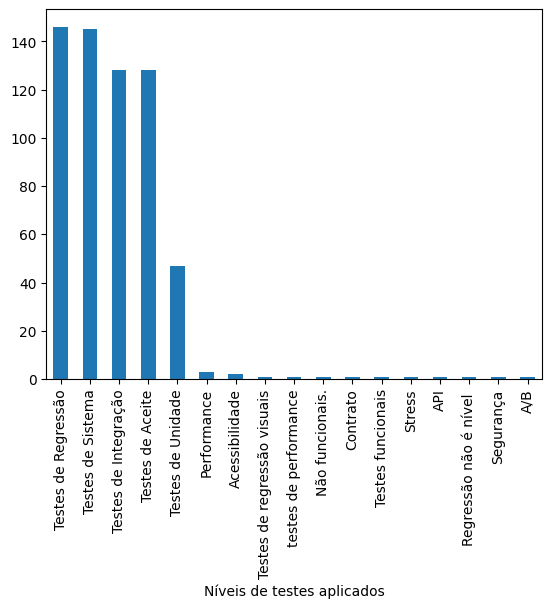

In [198]:
given_df_col_return_split_values(df['Níveis de testes aplicados'], 'Níveis de testes aplicados').value_counts().plot(kind='bar')

### Types of Tests

In [93]:
given_df_col_return_split_values(df['Tipos de testes aplicados'], 'Types of tests').value_counts()

Tipos de testes aplicados
Caixa Preta (Teste Funcional)      152
Manual                             150
Automatizado                       115
Usabilidade                        100
Performance                         78
Caixa Branca (Teste Estrutural)     71
Dinâmico                            54
Confiabilidade                      43
Estático                            42
Segurança                           34
Testes de Mutação                   27
caos                                 1
Acessibilidade                       1
Api                                  1
Carga                                1
Stress                               1
Teste de contrato                    1
Name: count, dtype: int64

<Axes: xlabel='Tipos de testes aplicados'>

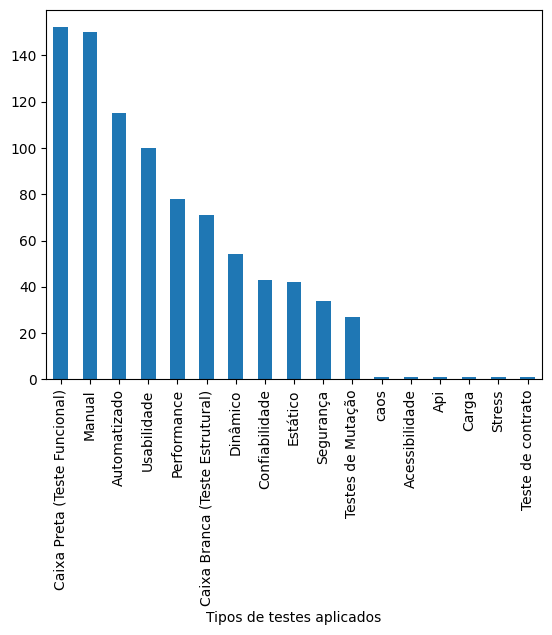

In [199]:
given_df_col_return_split_values(df['Tipos de testes aplicados'], 'types of tests').value_counts().plot(kind='bar')

### Others

In [94]:
# given_df_col_return_split_values(df['Outras atividades'], 'Outras atividades').value_counts()

In [95]:
pos = ['Pós-Graduado', 'Pos-graduação completo',
       'Mestre', 'Doutor', 'Pós-Graduação',
       'Pós graduação completa', 'Pós graduação']

df['Formação'] = df['Formação'].apply(lambda f: return_novo_valor_if_word_in_palavras(f, pos, 'Pós-Graduação'))

In [96]:
df['Formação'].value_counts()

Formação
Ensino Superior Completo      91
Ensino Superior Incompleto    32
Especialista                  30
Pós-Graduação                 14
Pós-Graduação Incompleta       2
Name: count, dtype: int64

In [97]:
given_df_col_return_split_values(df['Fontes de aprendizado'], 'Learning sources').value_counts()

Fontes de aprendizado
Plataformas online             33
Canais do Youtube              28
Medium                         25
Comunidades e redes sociais    23
Artigos acadêmicos             18
Livros                          7
Pesquisas no Google             2
Github ou Stack Overflow        2
Name: count, dtype: int64

In [98]:
df

,Sexo,Localização,Formação,Organização,Experiência,Nível,Certificação,Sempre trabalhou na área,Cargo,Stacks,...,Linguagens de programação,Dificuldades em encontrar materiais de estudo,Fontes de aprendizado,5 habilidades fundamentais para um QA,Atividades desempenhadas,Etapas da Engenharia de Software,Níveis de testes aplicados,Tipos de testes aplicados,"Existem outras atividades, não mencionadas no formulário, que você executa durante o processo de testes de software?","Qual a sua percepção sobre a utilização de assistentes inteligentes e LLMs para geração de dados de teste? Vantagens, desvantagens e ajuda mesmo em cenários com lógicas complexas? Comenta aqui pra gente ;)"
1,Masculino,BA,Ensino Superior Completo,Média (até 499 funcionários),De 4 a 7 anos,Pleno,Sim,Sim,Analista de Automação de Testes,"Web, Mobile",...,"Java, JavaScript, Python, Ruby",Não,Medium,"Aprender rápido, Ser detalhista, Ser curioso, ...",Avaliar e garantir que os requisitos sejam ate...,Integração e Testes do Sistema,"Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Caixa Branca (T...",Nao,NaN
2,Feminino,MG,Ensino Superior Incompleto,Grande (mais de 499 funcionários),Menos de 1 ano,Júnior,Não,Sim,Quality Assurance - QA,Web,...,Java,Sim,NaN,"Aprender rápido, Pensar como técnico e usuário...",Avaliar e garantir que os requisitos sejam ate...,Integração e Testes do Sistema,"Testes de Sistema, Testes de Regressão","Caixa Preta (Teste Funcional), Manual",Nao,NaN
3,Masculino,PR,Ensino Superior Completo,Grande (mais de 499 funcionários),De 4 a 7 anos,Sênior,Sim,Não,Analista de sistemas senior,Web,...,"Java, Ruby",Sim,Plataformas online,"Aprender rápido, Ser comunicativo(a), Ser deta...",Realizar automação dos testes,"Integração e Testes do Sistema, Operação e Man...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Manual, Automat...",Não,NaN
4,Feminino,BA,Ensino Superior Incompleto,Média (até 499 funcionários),De 1 a 3 anos,Júnior,Sim,Sim,Analista de Teste,"Web, Mobile",...,"Java, JavaScript",Não,Comunidades e redes sociais,"Aprender rápido, Ser analítico, Pensar como té...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Integração e Testes ...","Testes de Sistema, Testes de Regressão, Testes...","Caixa Preta (Teste Funcional), Dinâmico, Manual",Não,NaN
5,Feminino,MG,Especialista,Grande (mais de 499 funcionários),De 8 a 11 anos,Pleno,Não,Não,Engenheira de software - Tester,"Web, Mobile, Backend",...,"Java, C#",Sim,Livros,"Aprender rápido, Ser comunicativo(a), Ser deta...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Implementação e Test...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Manual, Automat...",Ajudar a melhorar o processo de trabalho da eq...,NaN
6,Masculino,PR,Ensino Superior Incompleto,Grande (mais de 499 funcionários),De 8 a 11 anos,Sênior,Não,Não,Automation Enginner SR,"Web, Mobile, Backend",...,"Java, JavaScript, Python, C#",Sim,NaN,"Aprender rápido, Ser comunicativo(a), Ser curi...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Projeto do Software,...","Testes de Integração, Testes de Sistema, Teste...","Caixa Preta (Teste Funcional), Caixa Branca (T...",Apoio outros QAs a se desenvolver com novas li...,NaN
7,Feminino,SP,Pós-Graduação Incompleta,Grande (mais de 499 funcionários),De 8 a 11 anos,Sênior,Sim,Sim,Analista de Teste,"Web, Mobile",...,"Java, Python, Cypress",Sim,Plataformas online,"Aprender rápido, Ser analítico, Ser autoconfia...",Avaliar e garantir que os requisitos sejam ate...,"Definição dos Requisitos, Projeto do Software,...","Testes de Unidade, Testes de Integração, Teste...","Caixa Preta (Teste Funcional), Caixa Branca (T...",Sim estruturação e entendimento do projeto que...,NaN
8,Masculino,DF,Ensino Superior Completo,Média (até 499 funcionários),De 1 a 3 anos,Sênior,Não,Sim,Analista de Teste,"Web, Mobile, Backend",...,"Java, Ja

In [99]:
df['Formação'].value_counts()

Formação
Ensino Superior Completo      91
Ensino Superior Incompleto    32
Especialista                  30
Pós-Graduação                 14
Pós-Graduação Incompleta       2
Name: count, dtype: int64

| Research Questions <br>Description                                                                     |                                                                                                                             |
|----------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| RQ1: How can the QAs’ profile in Brazil be <br>defined in the software development life cycle?         | To answer this RQ, we identify professional profile<br> for Brazilians QAs taking into account their role and<br> responsibilities. |
| RQ2: What are the most important skills to be an <br>effective QA analyst and progress in this career? | This RQ seeks to identify essential technical and <br>non-technical skills.                                                     |

# RQ1
___
Identify the professional **profile** based on the **Position** and **Responsibilities**.

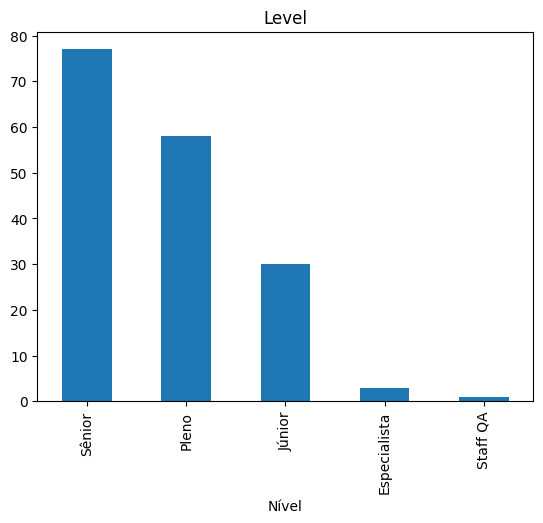

In [100]:
ax = df['Nível'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Level")

<Axes: xlabel='Etapas da Engenharia de Software'>

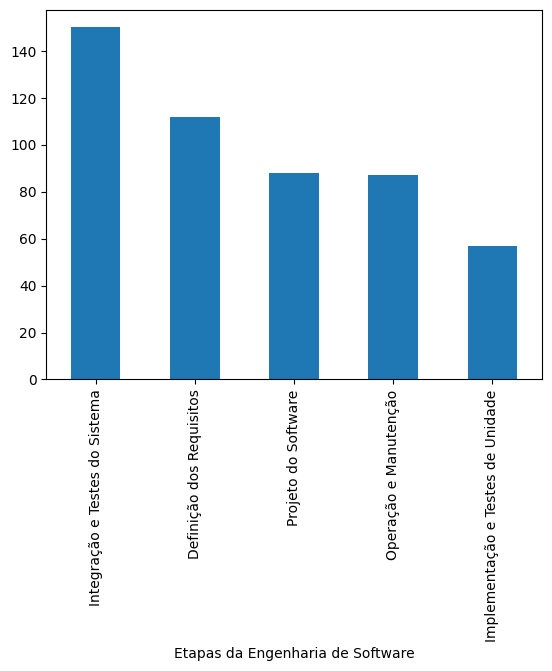

In [101]:
given_df_col_return_split_values(df['Etapas da Engenharia de Software'], 'Software Engineering Stages').value_counts().sort_values(ascending=False).plot(kind='bar')

# RQ2
___
Identify **technical and non-technical skills** for the professional in the field.

<Axes: xlabel='5 habilidades fundamentais para um QA'>

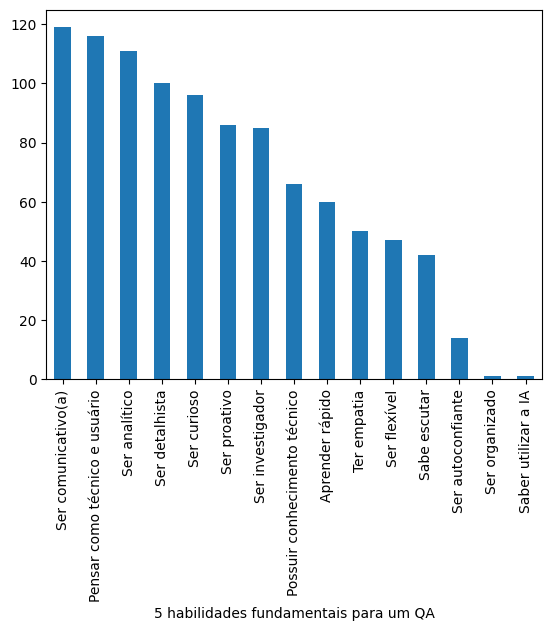

In [102]:
given_df_col_return_split_values(df['5 habilidades fundamentais para um QA'], '5 fundamental skills for a QA').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Tipos de testes aplicados'>

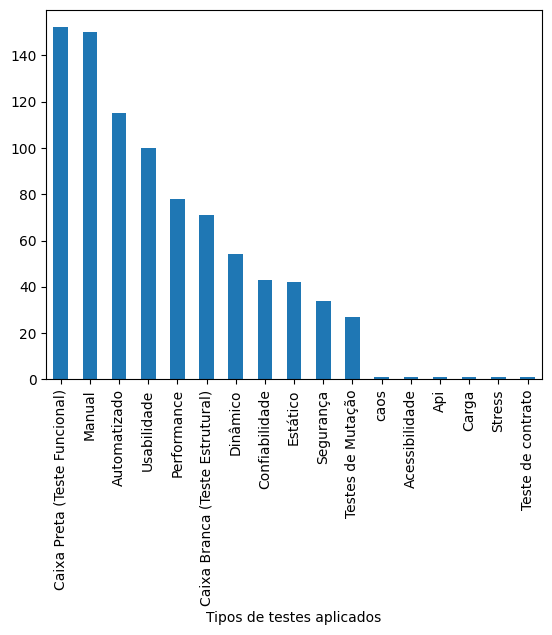

In [103]:
given_df_col_return_split_values(df['Tipos de testes aplicados'], 'Types of tests applied').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Linguagens de programação'>

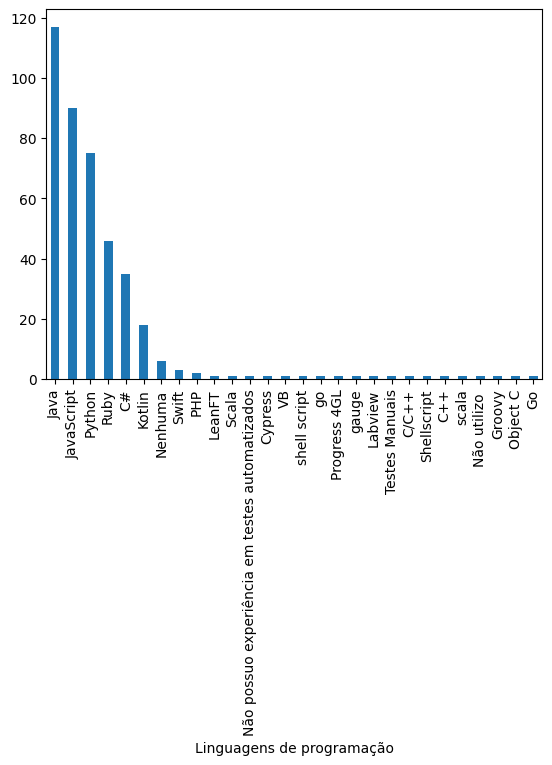

In [104]:
given_df_col_return_split_values(df['Linguagens de programação'], 'Programming Languages').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Stacks'>

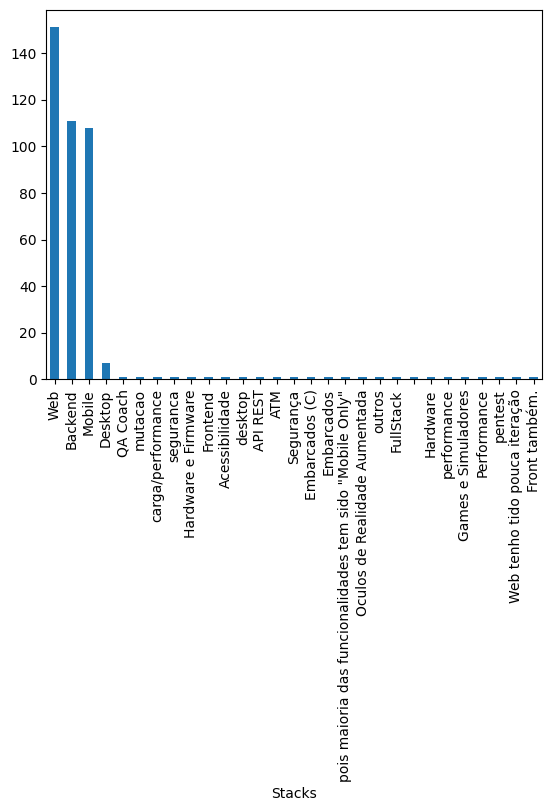

In [105]:
given_df_col_return_split_values(df['Stacks'], 'Stacks').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Ferramentas [Front-end]'>

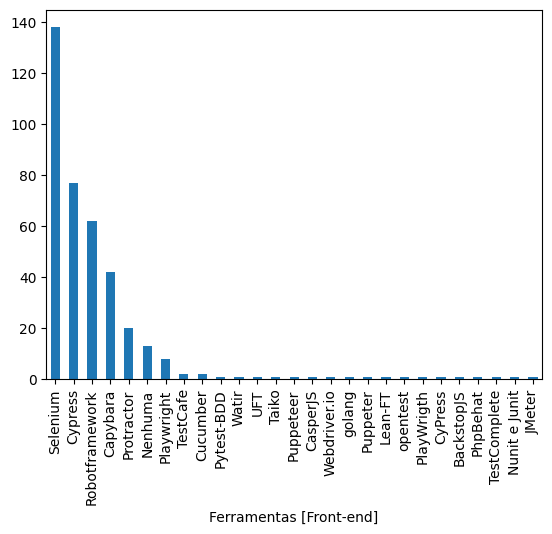

In [106]:
given_df_col_return_split_values(df['Ferramentas [Front-end]'], 'Tools for testing web applications (front-end)').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Ferramentas [Back-end]'>

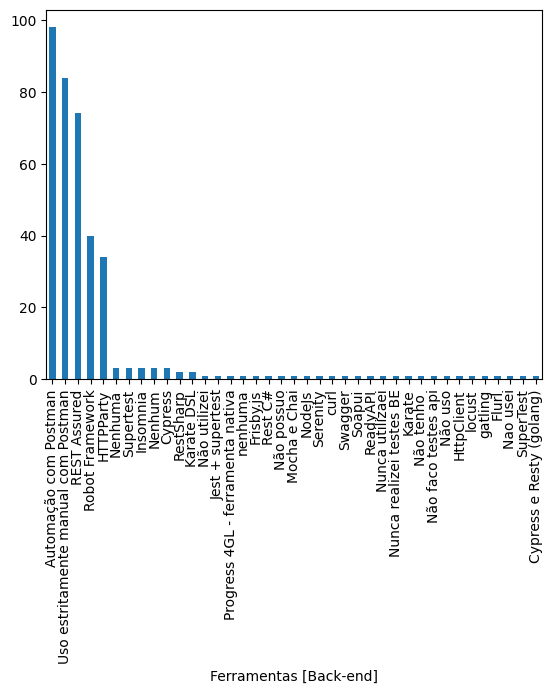

In [107]:
given_df_col_return_split_values(df['Ferramentas [Back-end]'], '[Back-end] Tools').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Ferramentas [Mobile]'>

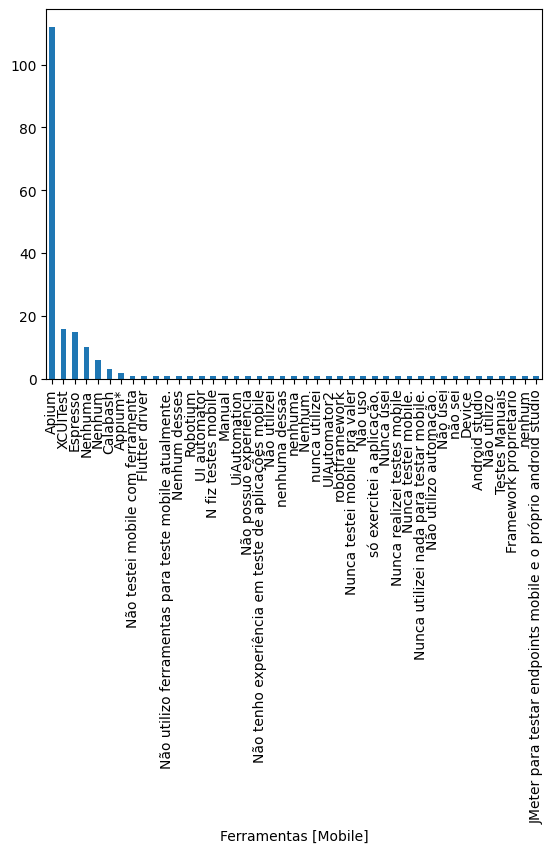

In [108]:
given_df_col_return_split_values(df['Ferramentas [Mobile]'], '[Mobile] Tools').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='5 habilidades fundamentais para um QA'>

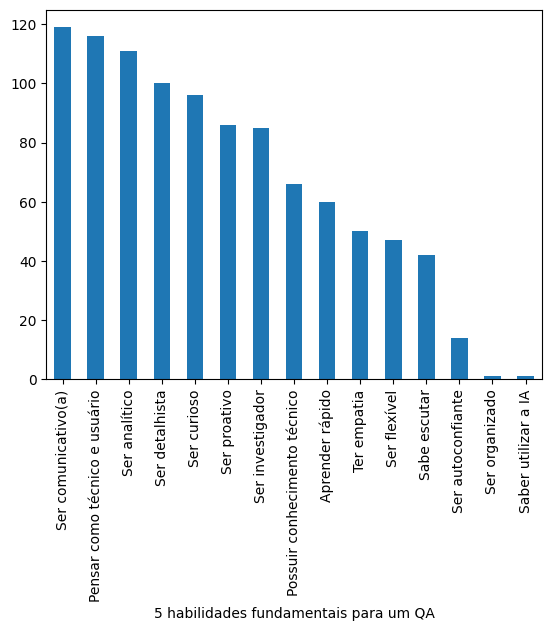

In [109]:
given_df_col_return_split_values(df['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Fontes de aprendizado'>

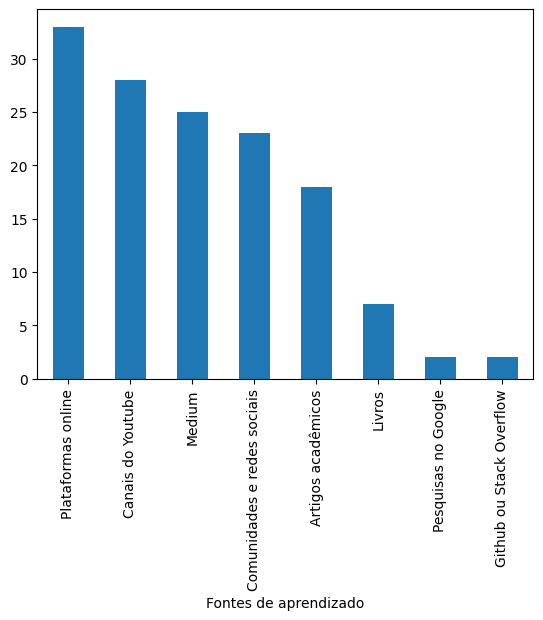

In [110]:
given_df_col_return_split_values(df['Fontes de aprendizado'], 'Learning sources').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Fontes de aprendizado'>

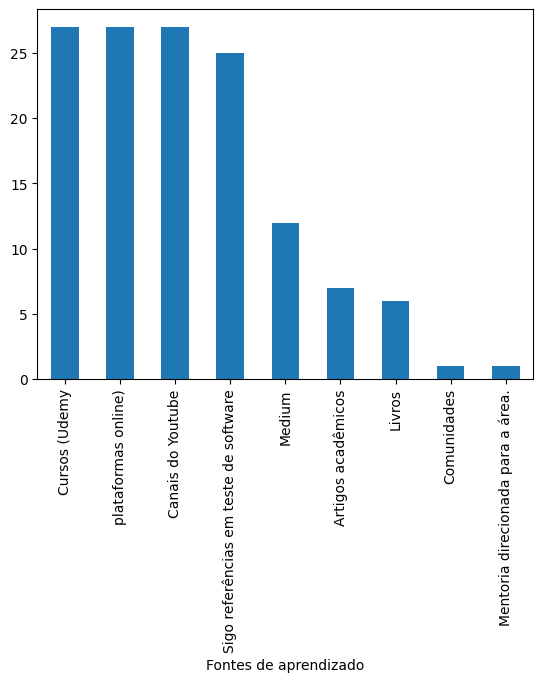

In [111]:
given_df_col_return_split_values(junior['Fontes de aprendizado'], 'Learning sources').value_counts().sort_values(ascending=False).plot(kind='bar')

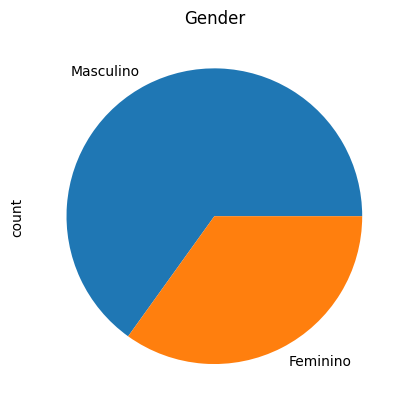

In [112]:
ax = df['Sexo'].value_counts().plot(kind='pie', title ="Gender")

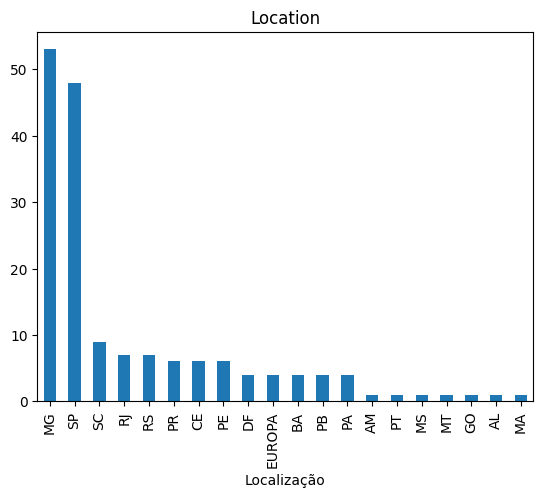

In [113]:
ax = df['Localização'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Location")

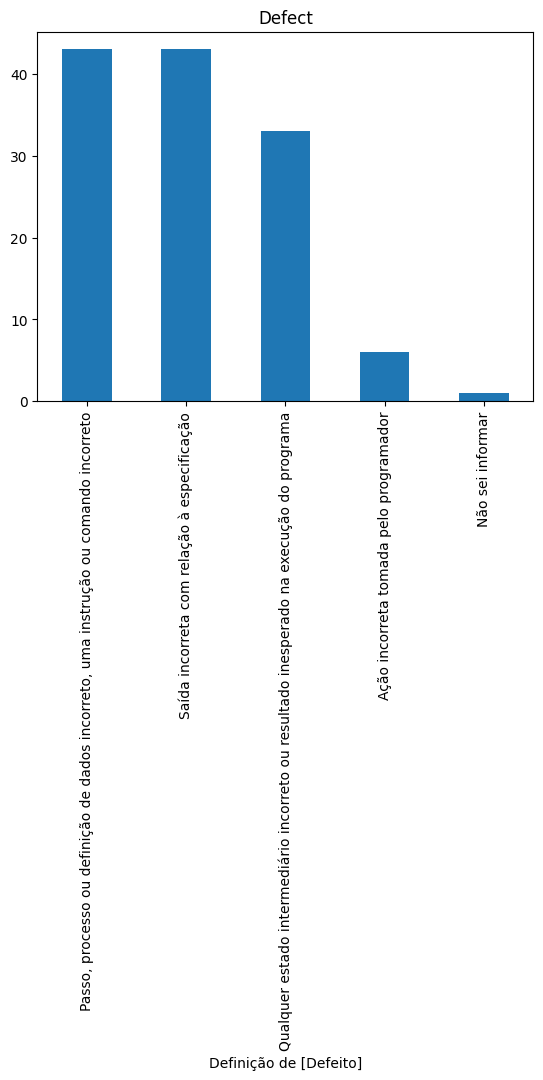

In [114]:
ax = df['Definição de [Defeito]'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Defect")

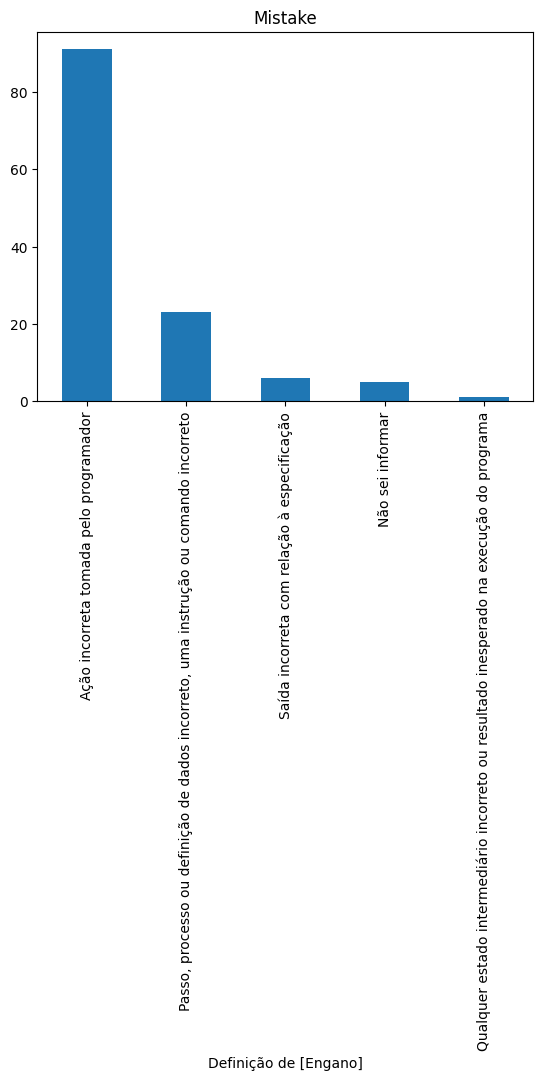

In [115]:
ax = df['Definição de [Engano]'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Mistake")

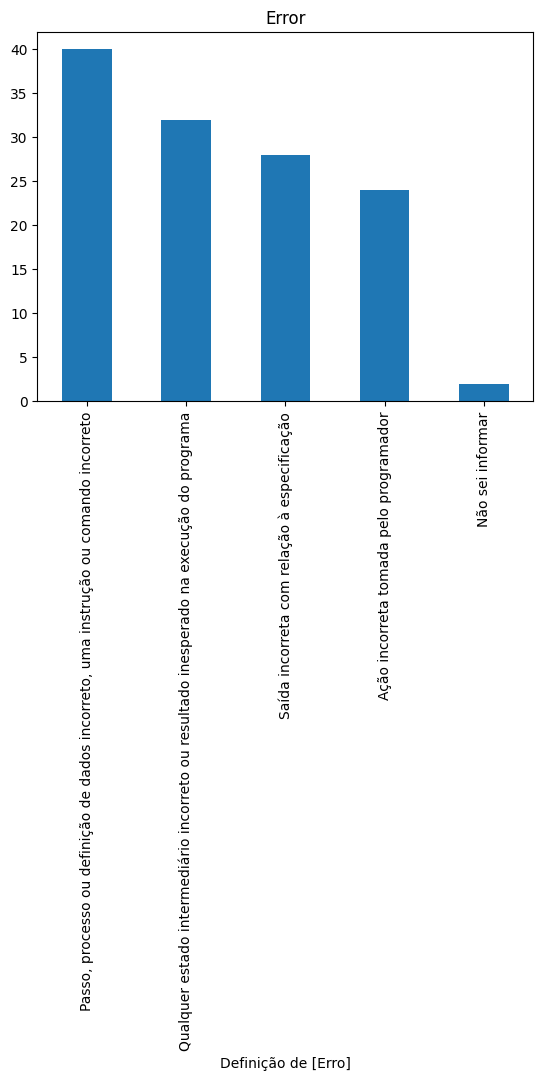

In [116]:
ax = df['Definição de [Erro]'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Error")

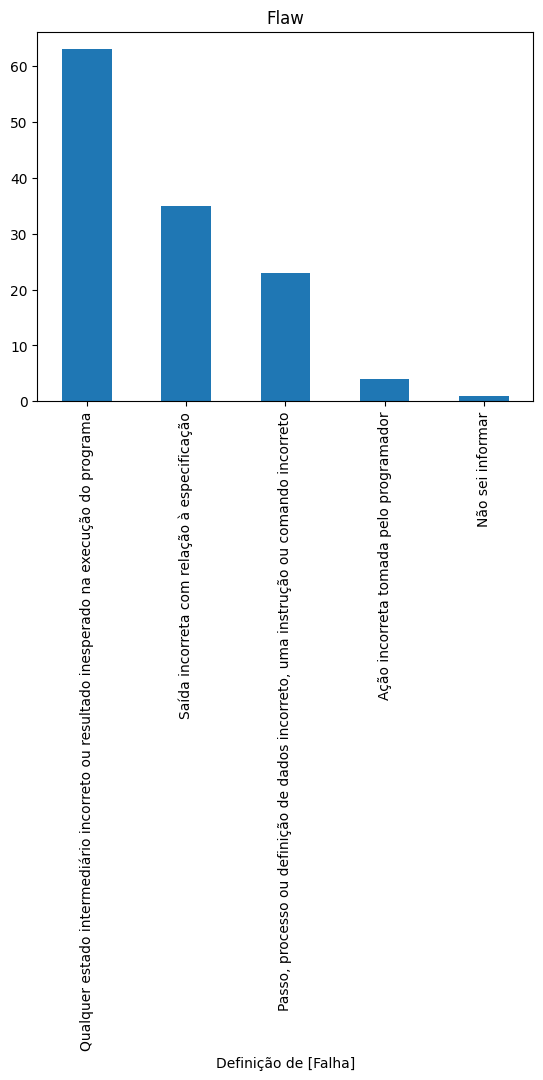

In [117]:
ax = df['Definição de [Falha]'].value_counts().sort_values(ascending=False).plot(kind='bar', title ="Flaw")

In [118]:
df.query("`Definição de [Falha]` in ['Correto']")['Nível'].value_counts()

Series([], Name: count, dtype: int64)

In [119]:
# ax = df.query("`Definição de [Erro]` in ['Correto'] and "
            #"`Definição de [Defeito]` in ['Correto'] and "
             # "`Definição de [Falha]` in ['Correto'] and "
              #"`Definição de [Engano]`in ['Correto']")['Cargo'].value_counts().sort_values(ascending=False).plot(kind='bar')

# Senior
---

In [120]:
senior = df.query("Nível == 'Sênior'")

In [121]:
senior['Experiência'].value_counts()

Experiência
De 4 a 7 anos       28
De 8 a 11 anos      27
De 1 a 3 anos       10
De 12 a 15 anos      9
Acima de 15 anos     2
Menos de 1 ano       1
Name: count, dtype: int64

In [122]:
senior['Sexo'].value_counts()

Sexo
Masculino    55
Feminino     22
Name: count, dtype: int64

<Axes: xlabel='Sexo'>

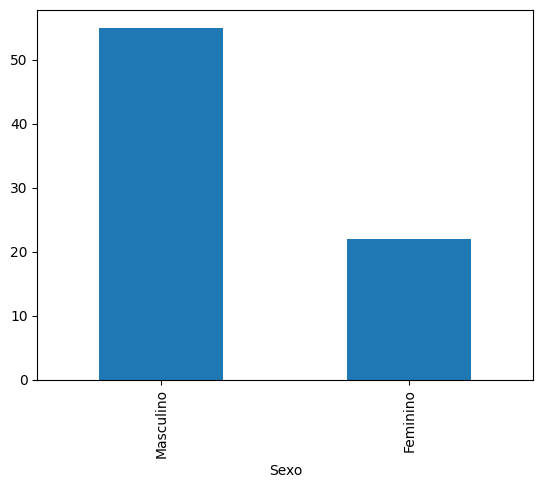

In [123]:
senior['Sexo'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [124]:
senior['Localização'].value_counts()

Localização
MG        22
SP        22
RS         6
RJ         4
SC         3
PE         3
PR         3
EUROPA     3
DF         2
CE         2
BA         1
AM         1
PT         1
MS         1
PA         1
PB         1
MA         1
Name: count, dtype: int64

In [125]:
senior['Formação'].value_counts()

Formação
Ensino Superior Completo      40
Especialista                  19
Ensino Superior Incompleto    11
Pós-Graduação                  6
Pós-Graduação Incompleta       1
Name: count, dtype: int64

In [126]:
senior['Experiência'].value_counts()

Experiência
De 4 a 7 anos       28
De 8 a 11 anos      27
De 1 a 3 anos       10
De 12 a 15 anos      9
Acima de 15 anos     2
Menos de 1 ano       1
Name: count, dtype: int64

In [127]:
senior_stacks = given_df_col_return_split_values(senior['Stacks'], 'Stacks')

In [128]:
senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, desk, 'Desktop'))

senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, remover, 'Remover'))

senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, performance, 'Performance'))

senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, front, 'Front-end'))

senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, embarcados, 'Embarcados'))

senior_stacks = senior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, segurança, 'Segurança'))


In [129]:
senior_stacks.value_counts()

Stacks
Web                    68
Backend                59
Mobile                 53
Desktop                 4
Segurança               2
Performance             2
Hardware e Firmware     1
Acessibilidade          1
ATM                     1
QA Coach                1
Embarcados              1
Remover                 1
Hardware                1
Name: count, dtype: int64

In [130]:
given_df_col_return_split_values(senior['Linguagens de programação'], 'Programming Languages').value_counts()

Linguagens de programação
Java            63
JavaScript      49
Python          46
Ruby            28
C#              24
Kotlin          10
Swift            3
C/C++            1
Shellscript      1
C++              1
Object C         1
scala            1
Labview          1
Progress 4GL     1
PHP              1
Scala            1
LeanFT           1
shell script     1
Cypress          1
Go               1
Name: count, dtype: int64

In [131]:
senior['Certificação'].value_counts()

Certificação
Sim    41
Não    36
Name: count, dtype: int64

<Axes: xlabel='Certificação'>

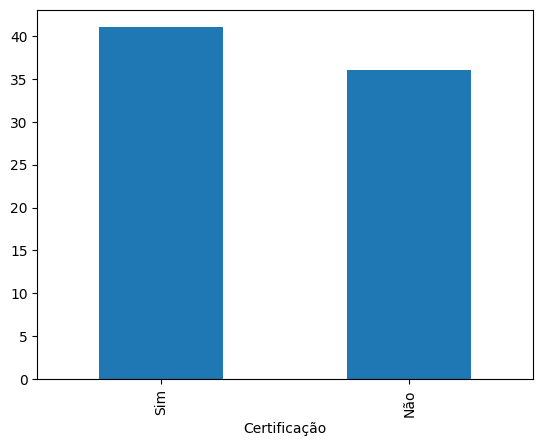

In [132]:
senior['Certificação'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Ferramentas [Mobile]'>

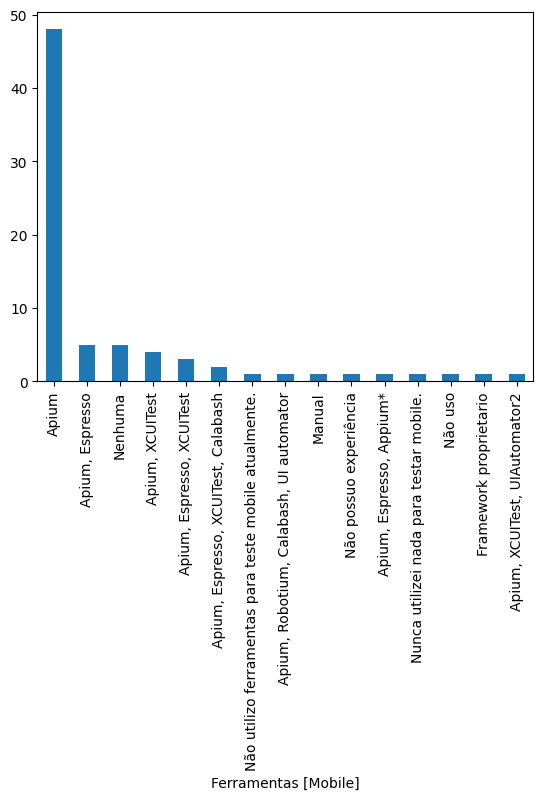

In [133]:
senior['Ferramentas [Mobile]'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [134]:
mobile_senior = given_df_col_return_split_values(senior['Ferramentas [Mobile]'], '[Mobile] Tools')

mobile_senior = mobile_senior[mobile_senior != 'Appium*']

In [135]:
mobile_senior.value_counts()

Ferramentas [Mobile]
Apium                                                    65
Espresso                                                 11
XCUITest                                                 10
Nenhuma                                                   5
Calabash                                                  3
Não utilizo ferramentas para teste mobile atualmente.     1
Robotium                                                  1
UI automator                                              1
Manual                                                    1
Não possuo experiência                                    1
Nunca utilizei nada para testar mobile.                   1
Não uso                                                   1
Framework proprietario                                    1
UIAutomator2                                              1
Name: count, dtype: int64

<Axes: xlabel='Ferramentas [Mobile]'>

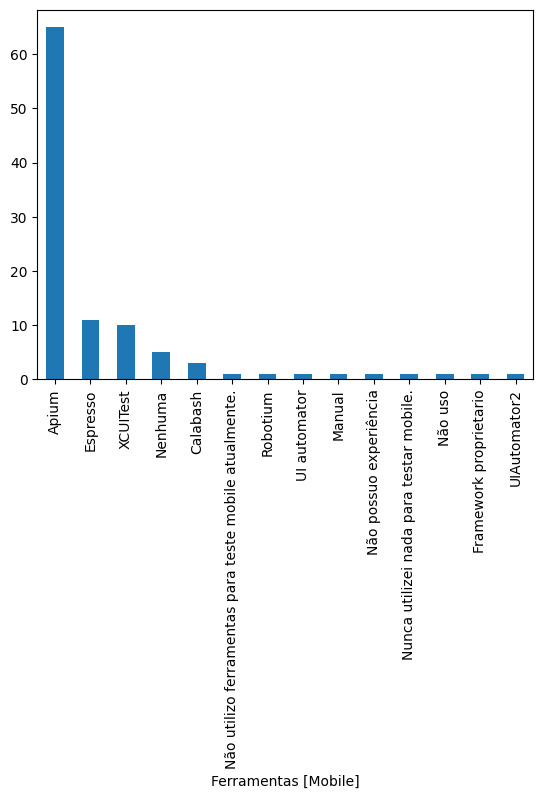

In [136]:
mobile_senior.value_counts().plot(kind='bar')

In [137]:
given_df_col_return_split_values(senior['Ferramentas [Back-end]'], '[Back-end] Tools').value_counts()

Ferramentas [Back-end]
Automação com Postman                  53
REST Assured                           45
Uso estritamente manual com Postman    42
Robot Framework                        27
HTTPParty                              20
Nenhuma                                 3
Karate DSL                              2
Cypress                                 2
Supertest                               2
NodeJs                                  1
Mocha e Chai                            1
curl                                    1
Frisby.js                               1
Progress 4GL - ferramenta nativa        1
Jest + supertest                        1
Não uso                                 1
locust                                  1
gatling                                 1
Rest C#                                 1
SuperTest                               1
Nenhum                                  1
Cypress e Resty (golang)                1
Name: count, dtype: int64

In [138]:
given_df_col_return_split_values(senior['Ferramentas [Front-end]'], '[Front-end] Tools').value_counts()

Ferramentas [Front-end]
Selenium          70
Cypress           42
Robotframework    37
Capybara          24
Protractor        14
Playwright         6
Nenhuma            3
TestCafe           2
opentest           1
BackstopJS         1
CyPress            1
PlayWrigth         1
Puppeteer          1
Lean-FT            1
Webdriver.io       1
CasperJS           1
Watir              1
PhpBehat           1
Name: count, dtype: int64

<Axes: xlabel='Tipos de testes aplicados'>

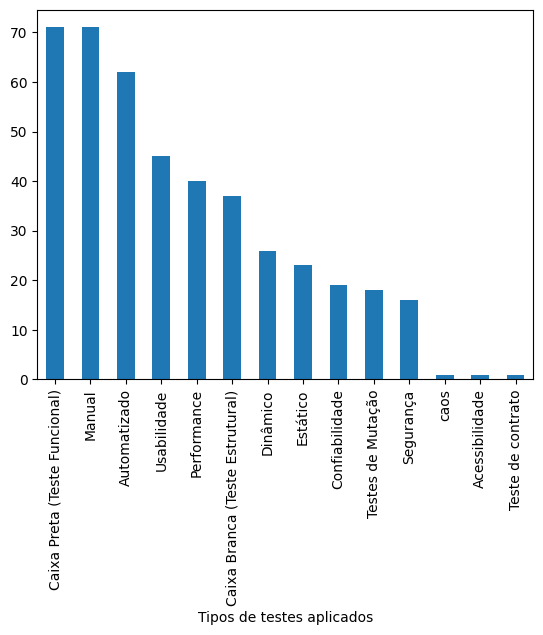

In [139]:
given_df_col_return_split_values(senior['Tipos de testes aplicados'], 'Types of tests applied').value_counts().sort_values(ascending=False).plot(kind='bar')

In [140]:
given_df_col_return_split_values(senior['Tipos de testes aplicados'], 'Types of tests applied').value_counts()

Tipos de testes aplicados
Caixa Preta (Teste Funcional)      71
Manual                             71
Automatizado                       62
Usabilidade                        45
Performance                        40
Caixa Branca (Teste Estrutural)    37
Dinâmico                           26
Estático                           23
Confiabilidade                     19
Testes de Mutação                  18
Segurança                          16
caos                                1
Acessibilidade                      1
Teste de contrato                   1
Name: count, dtype: int64

<Axes: xlabel='5 habilidades fundamentais para um QA'>

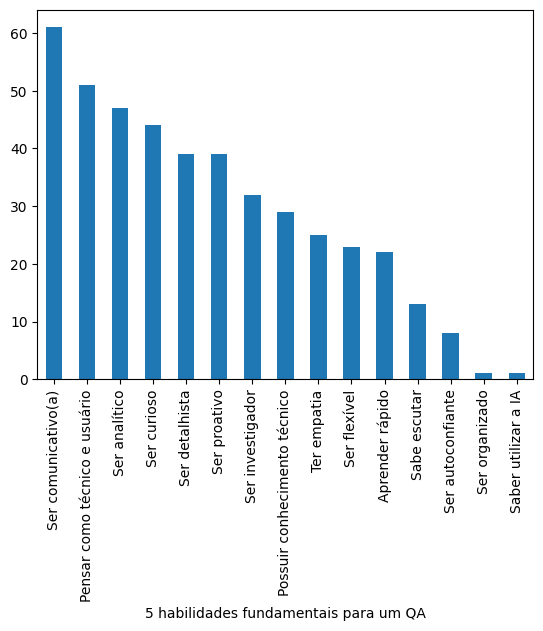

In [141]:
given_df_col_return_split_values(senior['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts().sort_values(ascending=False).plot(kind='bar')

In [142]:
# given_df_col_return_split_values(senior['Etap'], '5 atividades desempenhadas').value_counts().sort_values(ascending=False).plot(kind='bar')

In [143]:
given_df_col_return_split_values(senior['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts()

5 habilidades fundamentais para um QA
Ser comunicativo(a)              61
Pensar como técnico e usuário    51
Ser analítico                    47
Ser curioso                      44
Ser detalhista                   39
Ser proativo                     39
Ser investigador                 32
Possuir conhecimento técnico     29
Ter empatia                      25
Ser flexível                     23
Aprender rápido                  22
Sabe escutar                     13
Ser autoconfiante                 8
Ser organizado                    1
Saber utilizar a IA               1
Name: count, dtype: int64

<Axes: xlabel='5 habilidades fundamentais para um QA'>

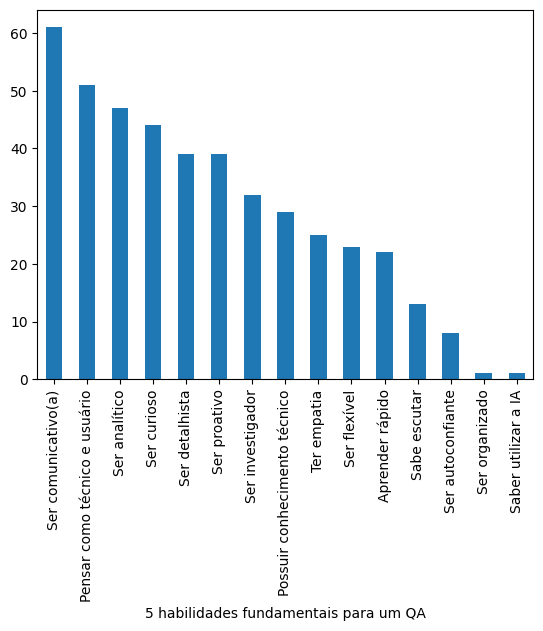

In [144]:
given_df_col_return_split_values(senior['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts().sort_values(ascending=False).plot(kind='bar')

In [145]:
senior['Dificuldades em encontrar materiais de estudo'].value_counts()

Dificuldades em encontrar materiais de estudo
Não    39
Sim    38
Name: count, dtype: int64

In [146]:
given_df_col_return_split_values(senior['Etapas da Engenharia de Software'], '[senior] Software Engineering Stages').value_counts()

Etapas da Engenharia de Software
Integração e Testes do Sistema       71
Definição dos Requisitos             52
Projeto do Software                  45
Operação e Manutenção                41
Implementação e Testes de Unidade    27
Name: count, dtype: int64

# Mid-level Developer
---

In [147]:
pleno['Sexo'].value_counts()

Sexo
Masculino    38
Feminino     20
Name: count, dtype: int64

In [148]:
pleno['Localização'].value_counts()

Localização
MG    19
SP    18
PB     3
PA     3
SC     3
BA     2
PE     2
PR     2
MT     1
GO     1
RJ     1
RS     1
CE     1
DF     1
Name: count, dtype: int64

In [149]:
pleno['Formação'].value_counts()

Formação
Ensino Superior Completo      34
Ensino Superior Incompleto     9
Especialista                   7
Pós-Graduação                  7
Pós-Graduação Incompleta       1
Name: count, dtype: int64

In [150]:
pleno['Experiência'].value_counts()

Experiência
De 1 a 3 anos     34
De 4 a 7 anos     16
De 8 a 11 anos     5
Menos de 1 ano     3
Name: count, dtype: int64

In [151]:
given_df_col_return_split_values(pleno['Stacks'], 'Stacks').value_counts()

Stacks
Web                              52
Backend                          38
Mobile                           34
Desktop                           2
API REST                          1
Embarcados (C)                    1
Oculos de Realidade Aumentada     1
Games e Simuladores               1
Front também.                     1
Name: count, dtype: int64

In [152]:
given_df_col_return_split_values(pleno['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts()

5 habilidades fundamentais para um QA
Ser detalhista                   39
Ser comunicativo(a)              39
Pensar como técnico e usuário    39
Ser analítico                    38
Ser investigador                 32
Ser curioso                      31
Ser proativo                     30
Aprender rápido                  26
Sabe escutar                     20
Possuir conhecimento técnico     19
Ser flexível                     14
Ter empatia                      12
Ser autoconfiante                 3
Name: count, dtype: int64

In [153]:
pleno['Certificação'].value_counts()

Certificação
Não    44
Sim    14
Name: count, dtype: int64

In [154]:
pleno_stacks = given_df_col_return_split_values(pleno['Stacks'], 'Stacks')

In [155]:
pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, desk, 'Desktop'))

pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, remover, 'Remover'))

pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, performance, 'Performance'))

pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, front, 'Front-end'))

pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, embarcados, 'Embarcados'))

pleno_stacks = pleno_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, segurança, 'Segurança'))

In [156]:
pleno_stacks.value_counts()

Stacks
Web                              52
Backend                          38
Mobile                           34
Desktop                           2
API REST                          1
Embarcados                        1
Oculos de Realidade Aumentada     1
Games e Simuladores               1
Front-end                         1
Name: count, dtype: int64

In [157]:
pleno_langs = given_df_col_return_split_values(pleno['Linguagens de programação'], 'Programming Languages')

In [158]:
nones_lang = ['Não utilizei', 'nenhuma', 'Nunca utilizei', 'Nenhum', 'Não utilizo', 'Não possuo experiência em testes automatizados']
pleno_langs = pleno_langs.apply(lambda r: return_novo_valor_if_word_in_palavras(r, nones_lang, 'Nenhuma'))


In [159]:
pleno_langs.value_counts()

Linguagens de programação
Java            35
JavaScript      28
Python          18
Ruby            14
C#               8
Kotlin           6
Nenhuma          3
VB               1
gauge            1
Groovy           1
PHP              1
Não utilizo      1
Name: count, dtype: int64

In [160]:
pleno['Dificuldades em encontrar materiais de estudo'].value_counts()

Dificuldades em encontrar materiais de estudo
Sim                    29
Não                    28
Automação em geral      1
Name: count, dtype: int64

# Junior
---

In [161]:
junior = df.query("Nível == 'Júnior'")

In [162]:
junior['Sexo'].value_counts()

Sexo
Feminino     17
Masculino    13
Name: count, dtype: int64

In [163]:
junior['Localização'].value_counts()

Localização
MG        12
SP         6
CE         3
RJ         2
SC         2
BA         1
AL         1
DF         1
PE         1
EUROPA     1
Name: count, dtype: int64

In [164]:
junior['Formação'].value_counts()

Formação
Ensino Superior Completo      15
Ensino Superior Incompleto    11
Especialista                   4
Name: count, dtype: int64

In [165]:
junior['Experiência'].value_counts()

Experiência
Menos de 1 ano    17
De 1 a 3 anos     11
De 8 a 11 anos     1
De 4 a 7 anos      1
Name: count, dtype: int64

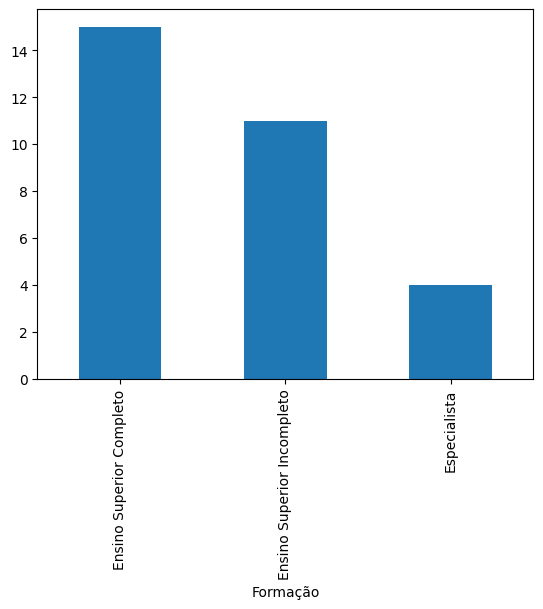

In [166]:
ax = junior['Formação'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [167]:
junior['Dificuldades em encontrar materiais de estudo'].value_counts()

Dificuldades em encontrar materiais de estudo
Sim    16
Não    14
Name: count, dtype: int64

In [168]:
junior_stacks = given_df_col_return_split_values(junior['Stacks'], 'Stacks')

In [169]:
junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, desk, 'Desktop'))

junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, remover, 'Remover'))

junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, performance, 'Performance'))

junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, front, 'Front-end'))

junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, embarcados, 'Embarcados'))

junior_stacks = junior_stacks.apply(lambda y: return_novo_valor_if_word_in_palavras(y, segurança, 'Segurança'))

In [170]:
junior_stacks.value_counts()

Stacks
Web          27
Mobile       17
Backend      10
Desktop       2
Front-end     1
Remover       1
FullStack     1
Name: count, dtype: int64

In [171]:
junior['Certificação'].value_counts()

Certificação
Não    22
Sim     8
Name: count, dtype: int64

In [172]:
given_df_col_return_split_values(junior['Linguagens de programação'], 'Programming Languages').value_counts()

Linguagens de programação
Java              17
JavaScript        11
Python             9
Nenhuma            4
Ruby               3
C#                 2
Kotlin             1
Testes Manuais     1
Name: count, dtype: int64

<Axes: xlabel='Tipos de testes aplicados'>

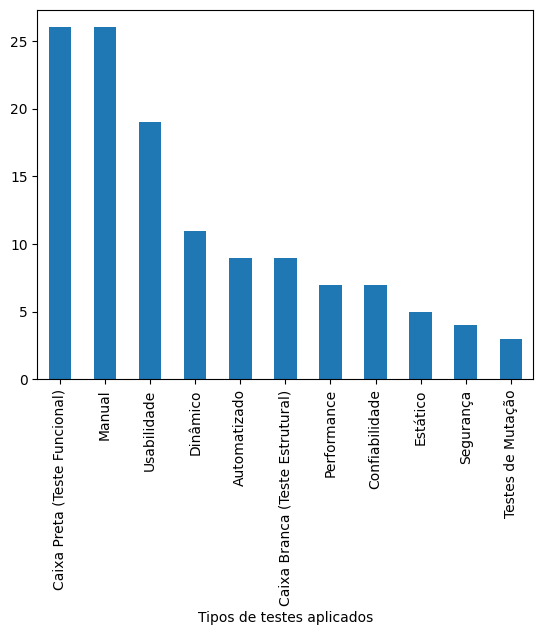

In [173]:
given_df_col_return_split_values(junior['Tipos de testes aplicados'], 'Types of tests applied').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Etapas da Engenharia de Software'>

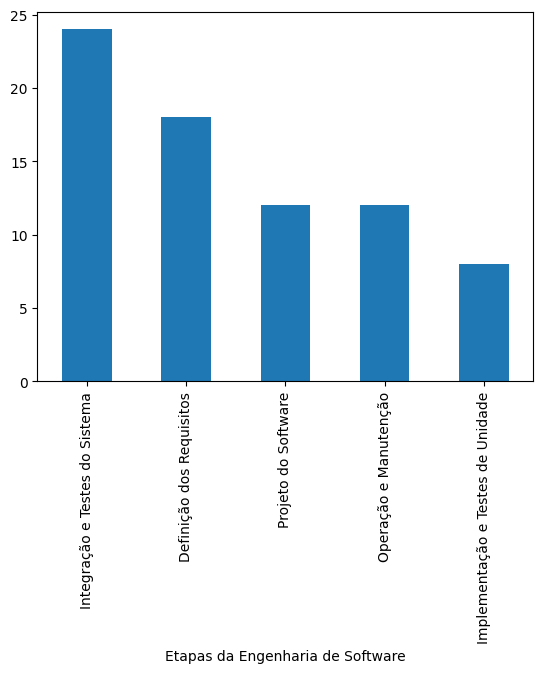

In [174]:
given_df_col_return_split_values(junior['Etapas da Engenharia de Software'], 'Software Engineering Steps').value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Etapas da Engenharia de Software'>

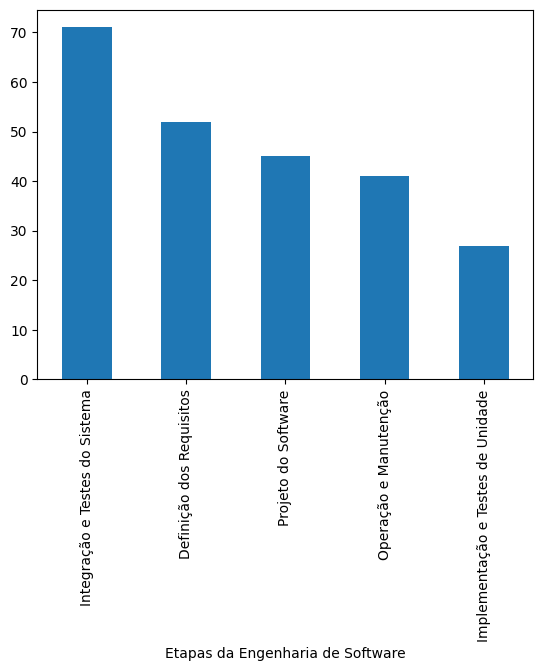

In [175]:
given_df_col_return_split_values(senior['Etapas da Engenharia de Software'], 'Software Engineering Steps').value_counts().sort_values(ascending=False).plot(kind='bar')

In [176]:
given_df_col_return_split_values(junior['Stacks'], 'Stacks').value_counts()

Stacks
Web          27
Mobile       17
Backend      10
Desktop       2
Frontend      1
outros        1
FullStack     1
Name: count, dtype: int64

In [177]:
given_df_col_return_split_values(junior['5 habilidades fundamentais para um QA'], 'Five fundamental skills for a QA').value_counts()

5 habilidades fundamentais para um QA
Pensar como técnico e usuário    23
Ser analítico                    22
Ser detalhista                   20
Ser investigador                 19
Ser curioso                      18
Ser comunicativo(a)              17
Ser proativo                     15
Possuir conhecimento técnico     14
Ter empatia                      12
Aprender rápido                  10
Ser flexível                      9
Sabe escutar                      8
Ser autoconfiante                 3
Name: count, dtype: int64

# Agile
---

In [178]:
agile = df.query("`Agile Testing` in [4, 5]")
bdd = df.query("`BDD` in [4, 5]")
cucumber = df.query("`Cucumber + Gherking` in [4, 5]")

In [179]:
agile['Nível'].value_counts()

Nível
Sênior          70
Pleno           41
Júnior          15
Especialista     2
Staff QA         1
Name: count, dtype: int64

In [180]:
bdd['Nível'].value_counts()

Nível
Sênior          68
Pleno           46
Júnior          17
Especialista     3
Staff QA         1
Name: count, dtype: int64

In [181]:
cucumber['Nível'].value_counts()

Nível
Sênior          56
Pleno           31
Júnior          12
Especialista     2
Staff QA         1
Name: count, dtype: int64

In [182]:
df.query("`Agile Testing` in [4, 5] and `BDD` in [4, 5]")['Nível'].value_counts()

Nível
Sênior          65
Pleno           37
Júnior           9
Especialista     2
Staff QA         1
Name: count, dtype: int64

In [183]:
query = """select count(df.Nível)
from df
where df.Nível='Sênior'
and df.`Agile Testing` in (4, 5)
and df.`BDD` in (4, 5)"""
print(sqldf(query).to_string(index=False))


 count(df.Nível)
              65


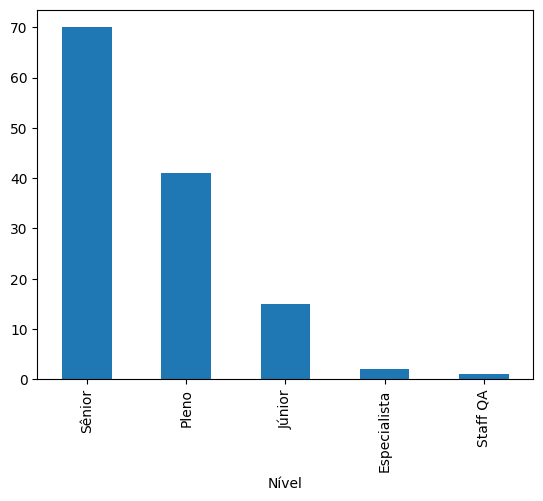

In [184]:
ax = agile['Nível'].value_counts().sort_values(ascending=False).plot(kind='bar')


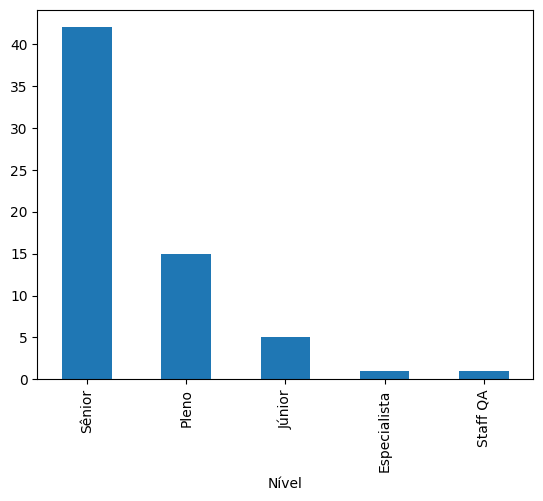

In [185]:
ax = df.query("`Agile Testing` in [5] and `BDD` in [5]")['Nível'].value_counts().sort_values(ascending=False).plot(kind='bar')

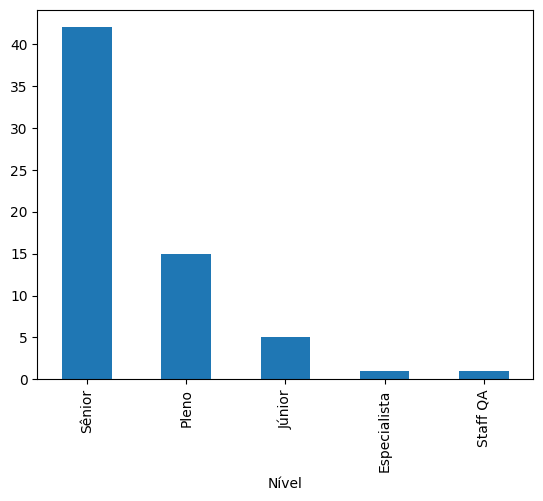

In [186]:
ax = df.query("`Agile Testing` in [5] and `BDD` in [5]")['Nível'].value_counts().sort_values(ascending=False).plot(kind='bar')


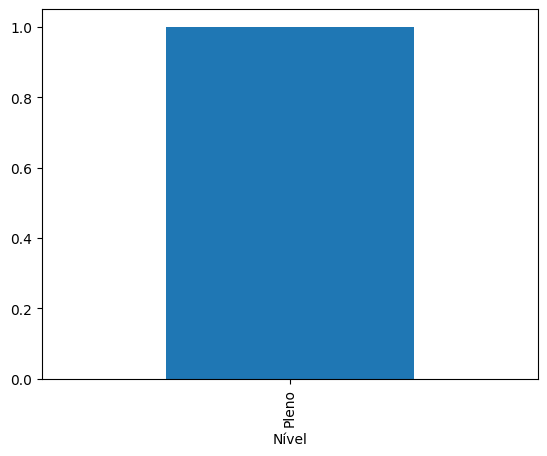

In [187]:
ax = df.query("`Agile Testing` in [1,2] and `BDD` in [4, 5] and `Cucumber + Gherking` in [4, 5]")['Nível'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [188]:
low_agile = df.query("`Agile Testing` in [1]")
low_agile['Nível'].value_counts()

Nível
Pleno     3
Sênior    1
Name: count, dtype: int64

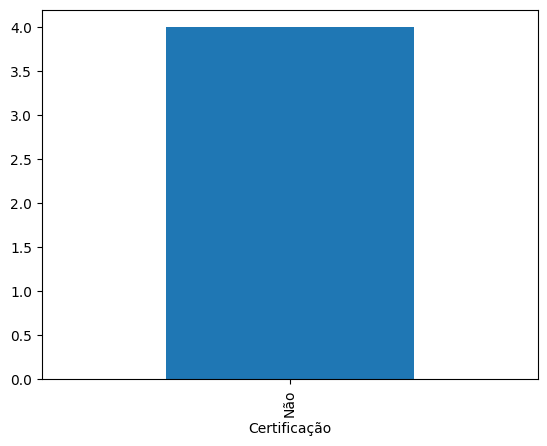

In [189]:
ax = low_agile['Certificação'].value_counts().sort_values(ascending=False).plot(kind='bar')
